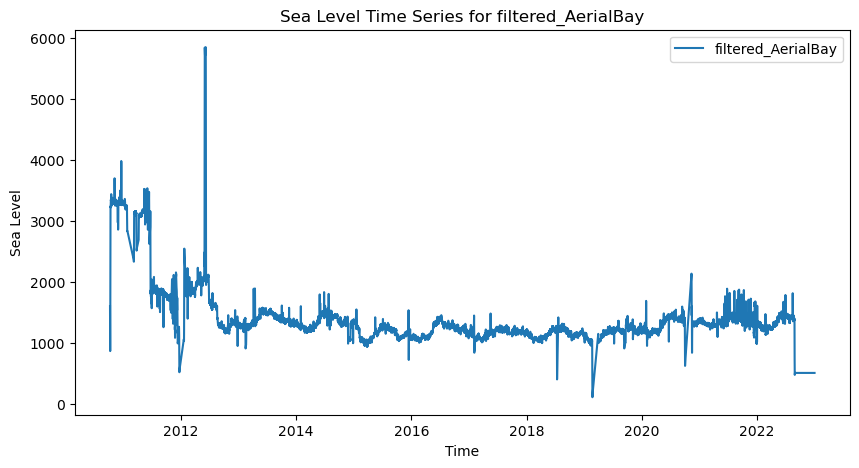

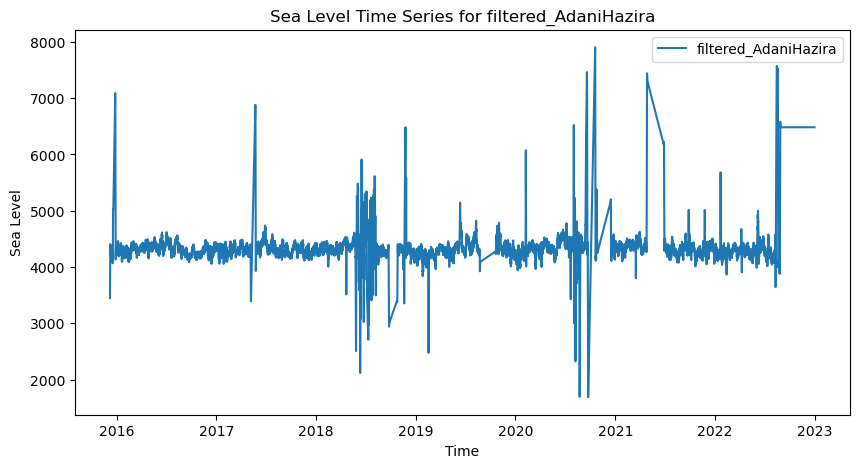

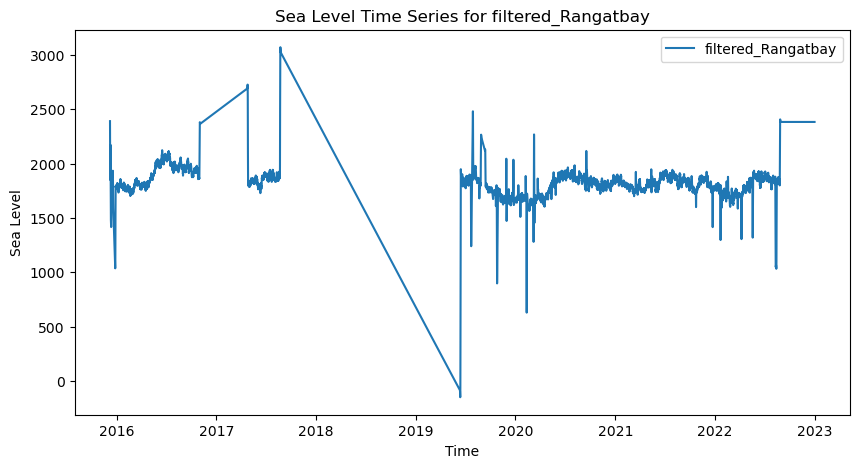

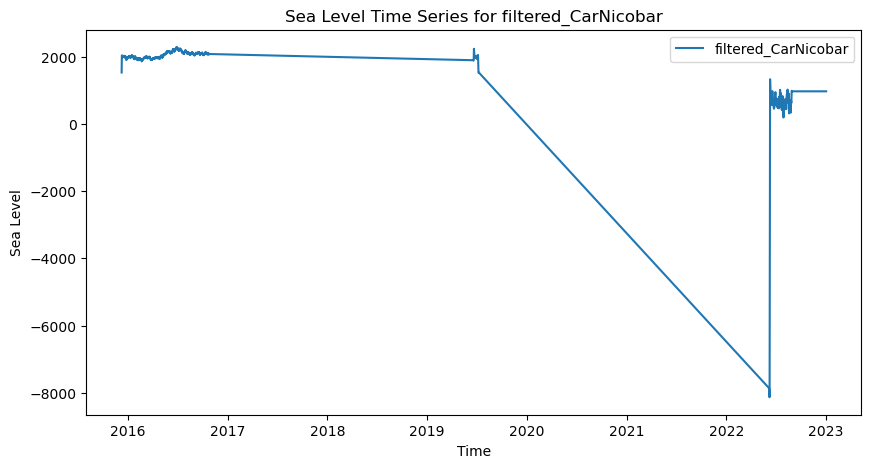

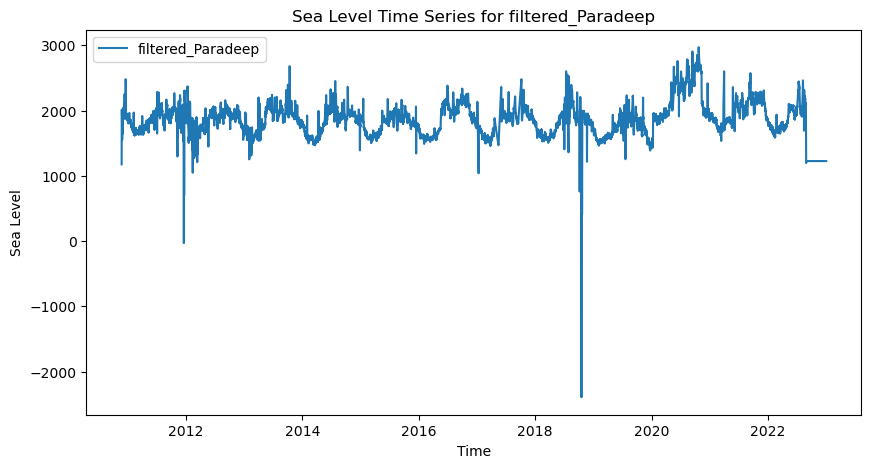

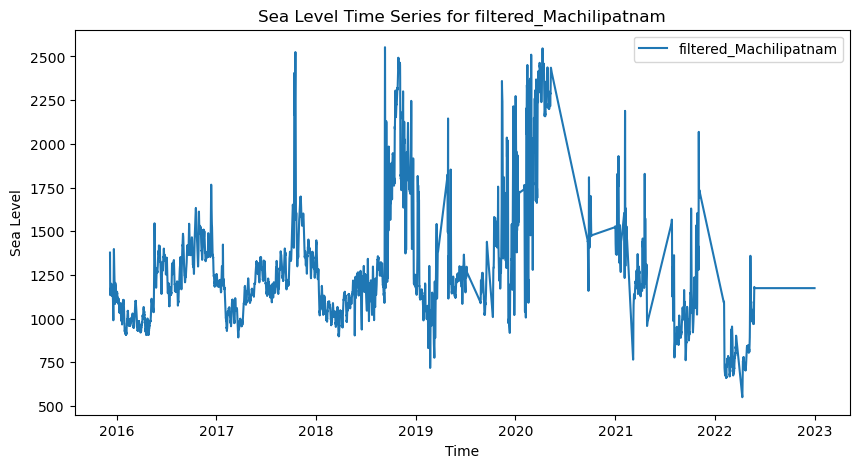

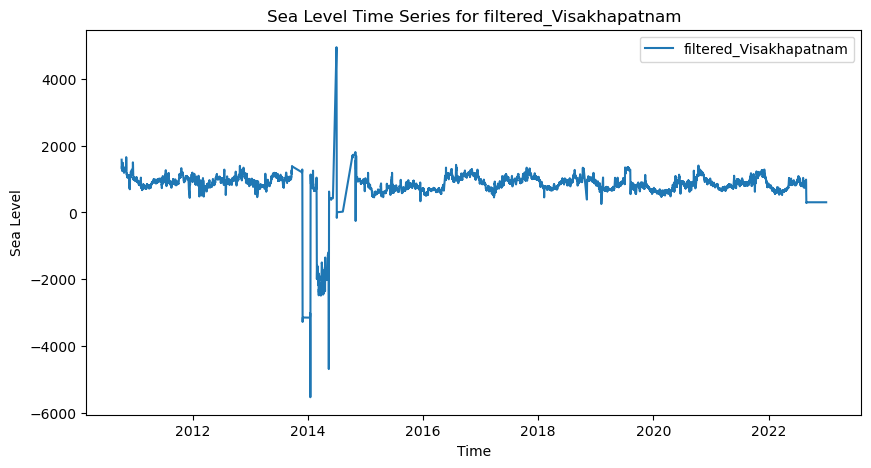

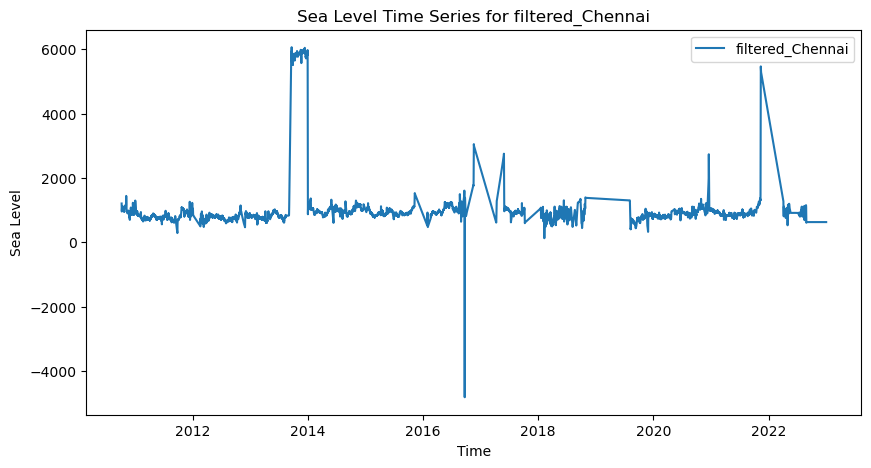

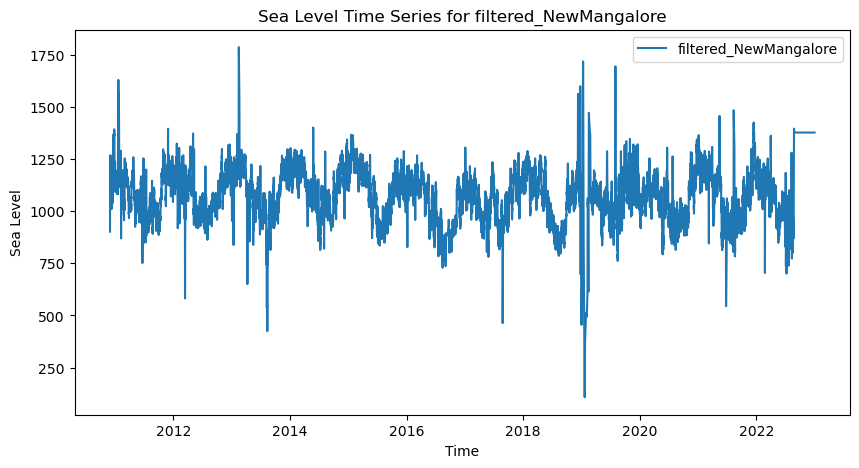

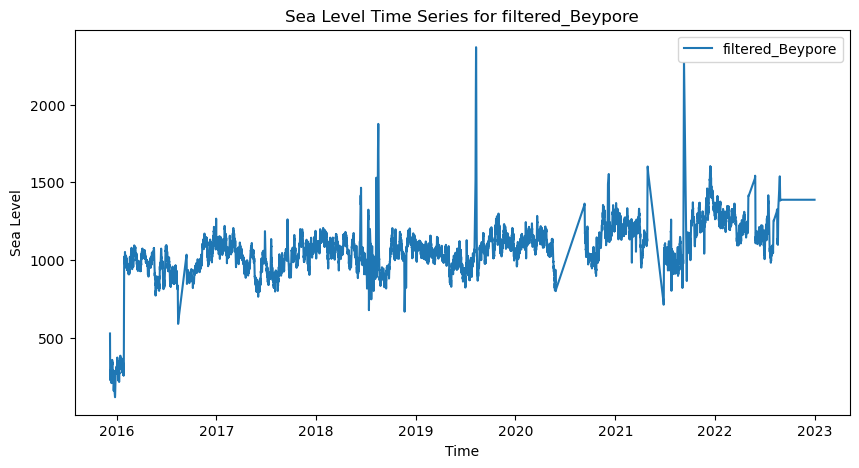

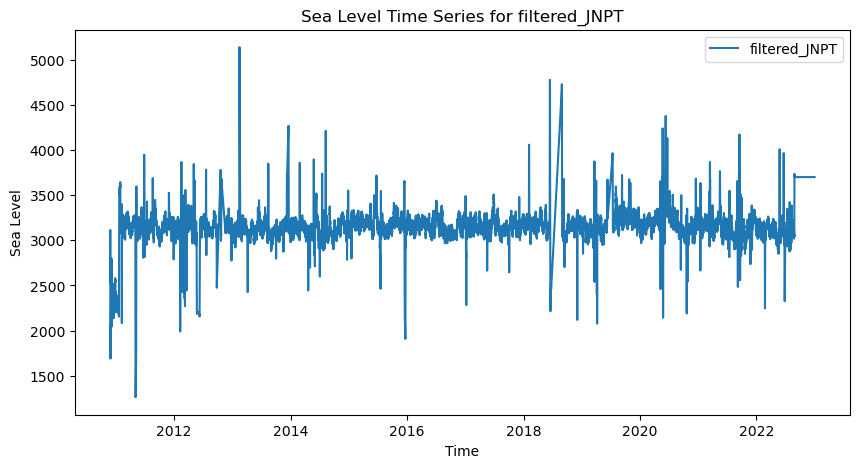

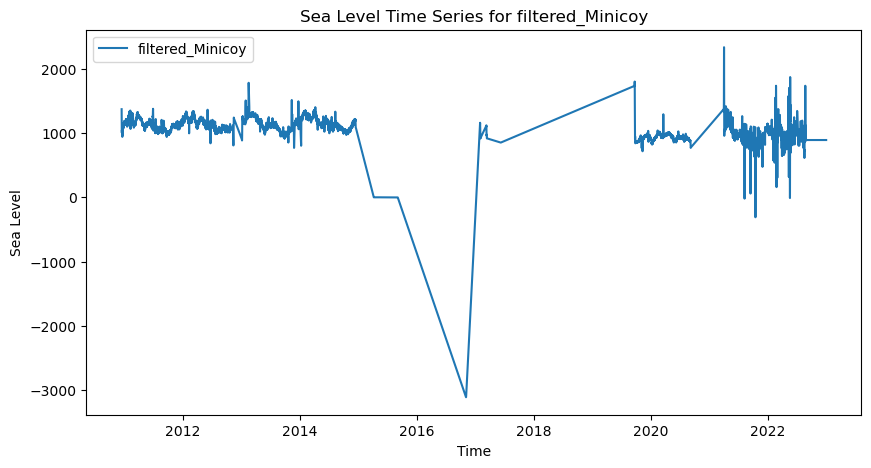

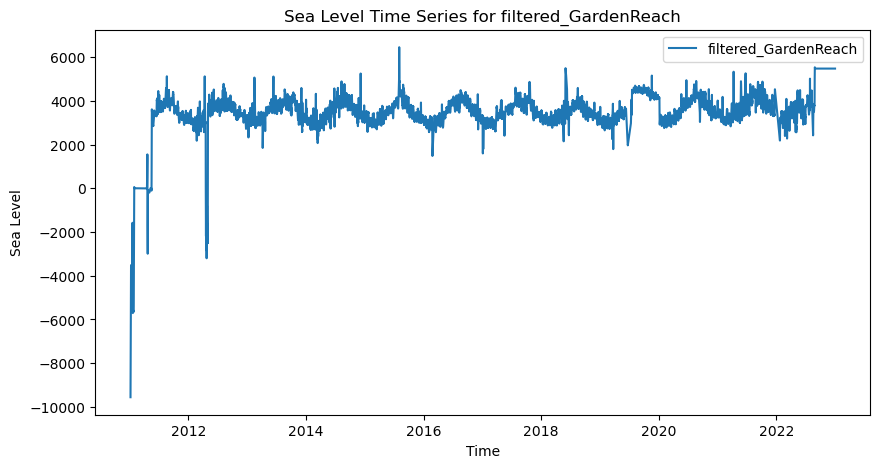

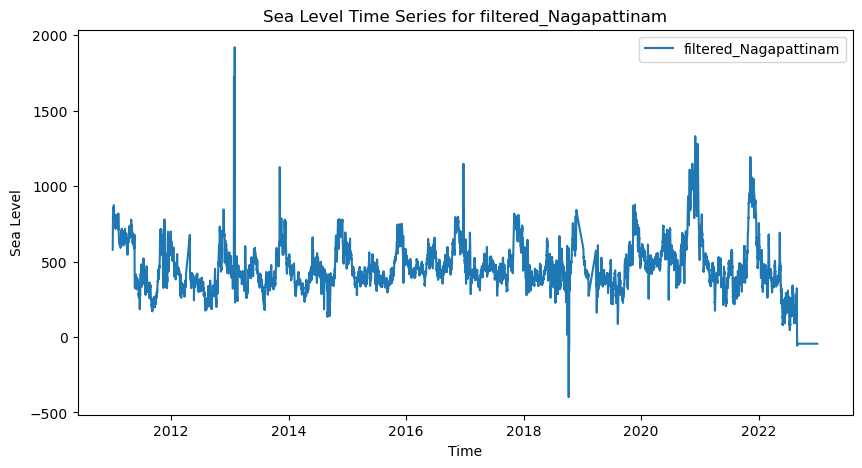

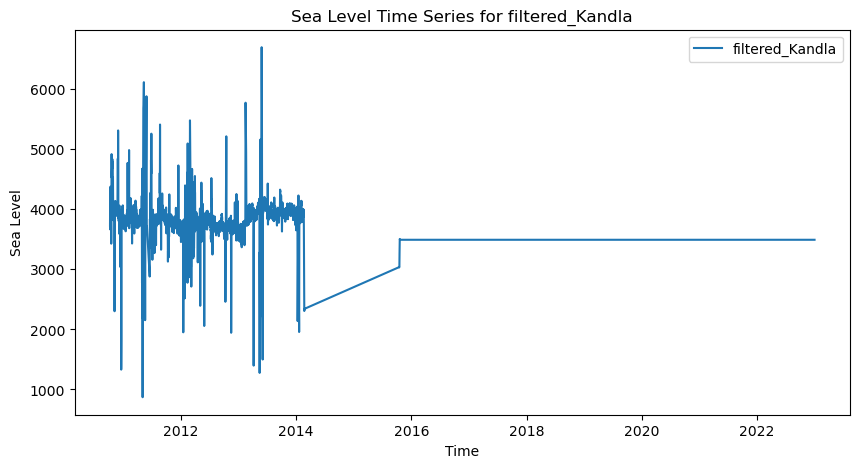

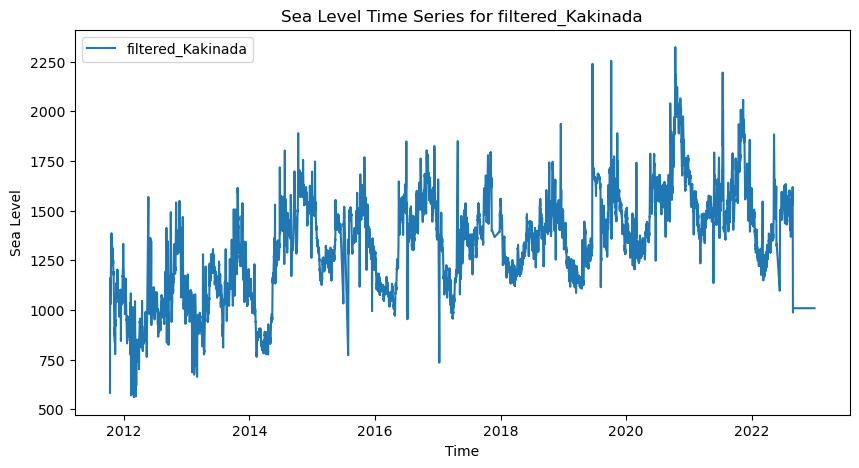

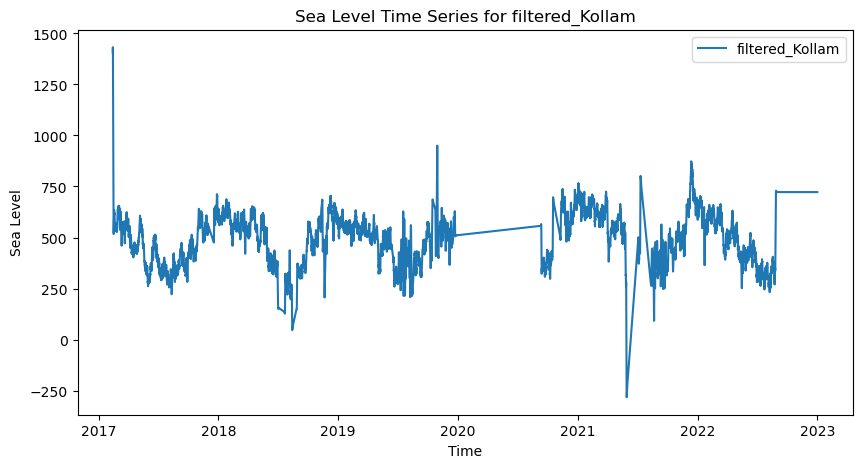

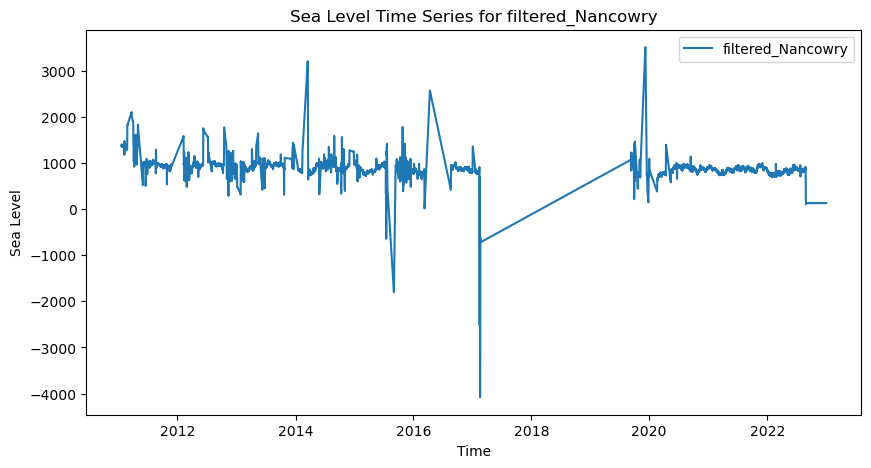

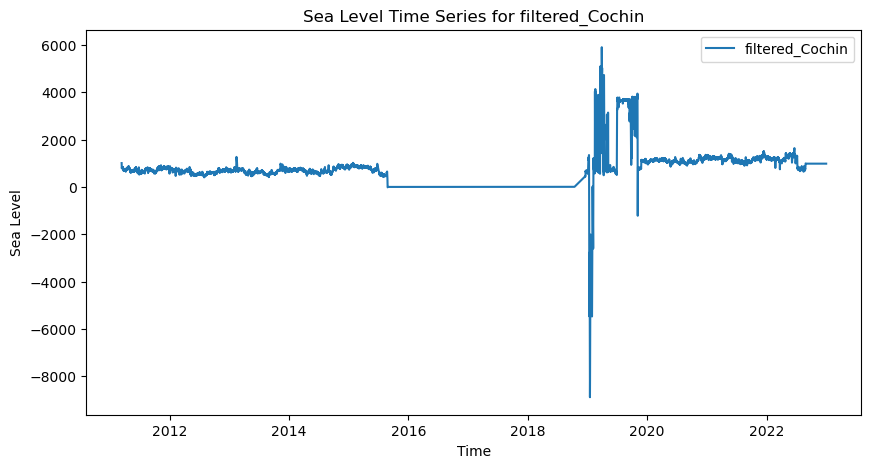

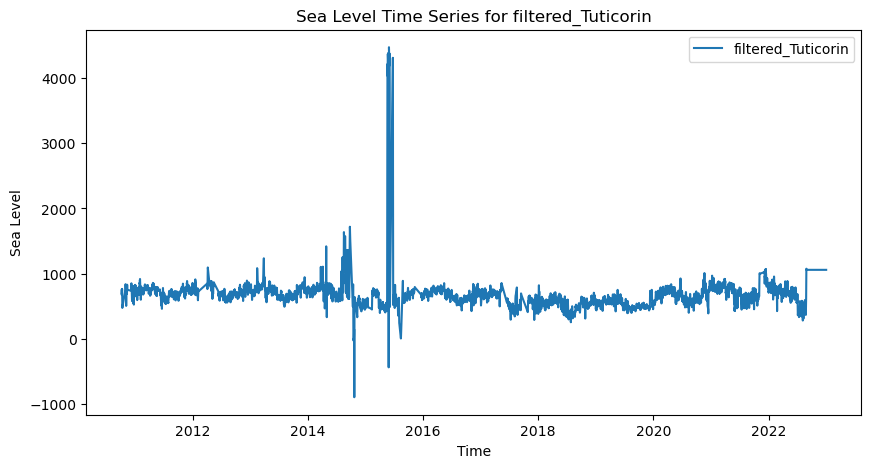

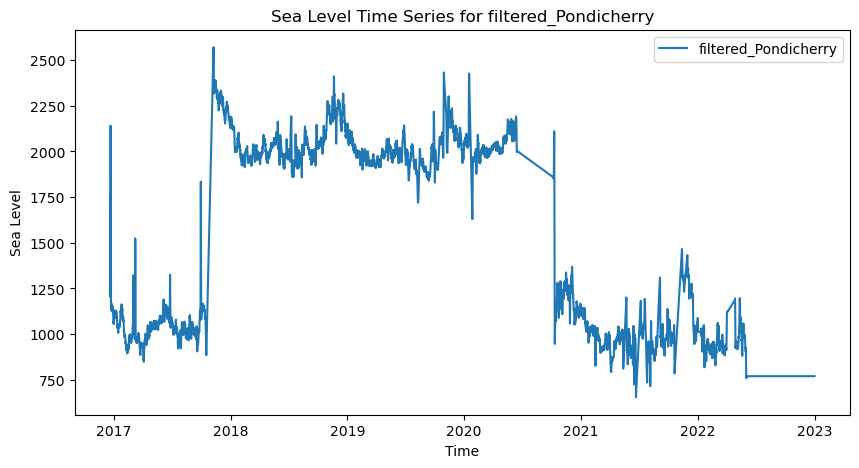

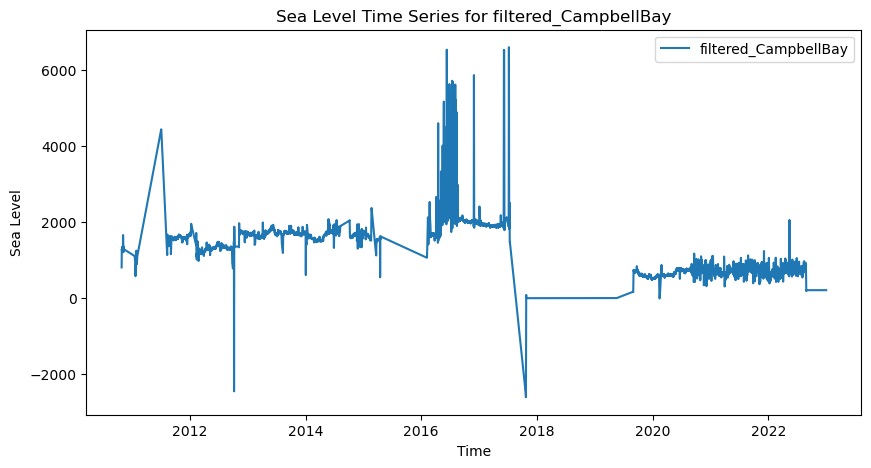

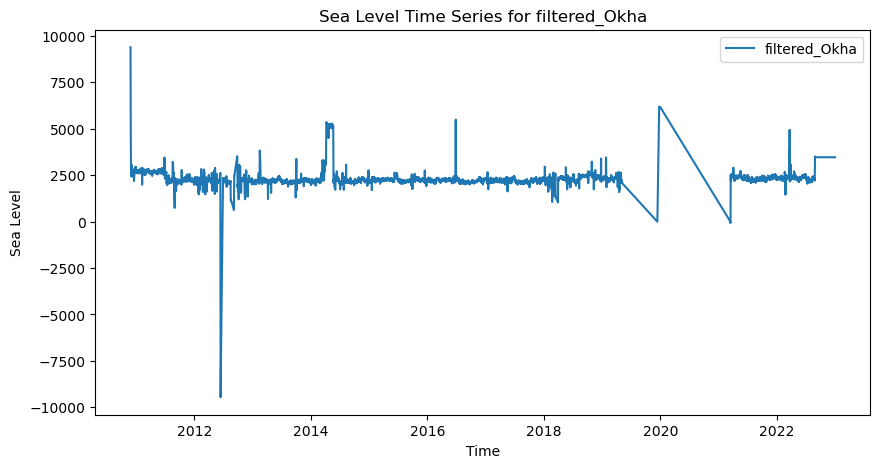

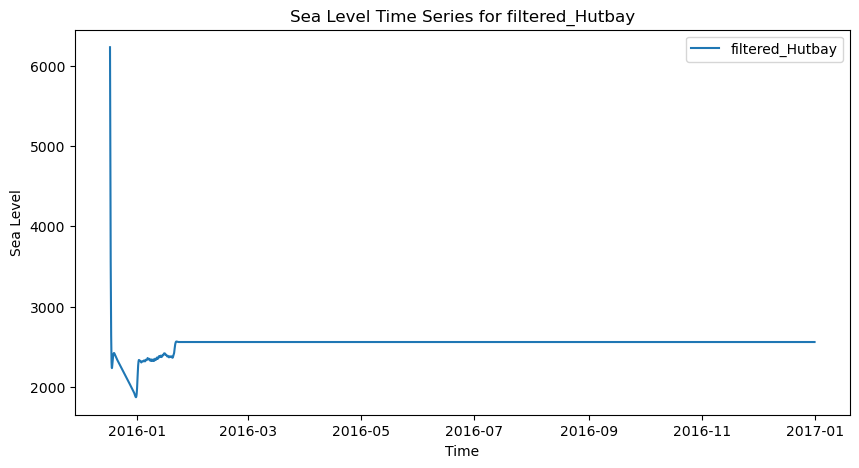

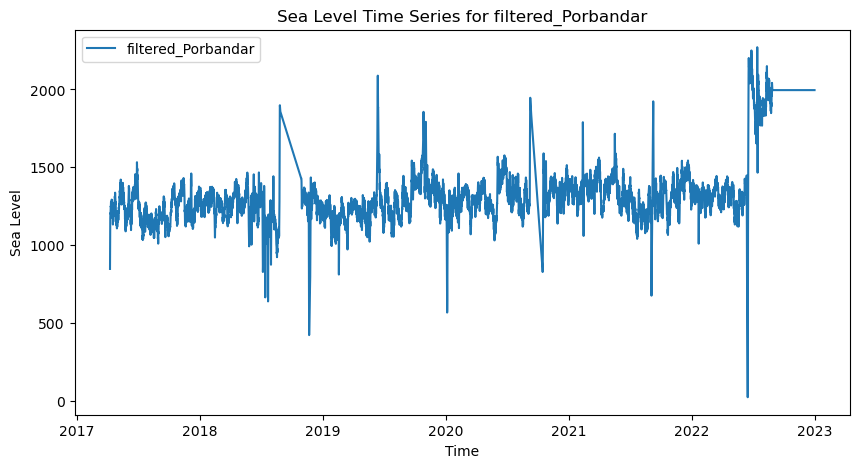

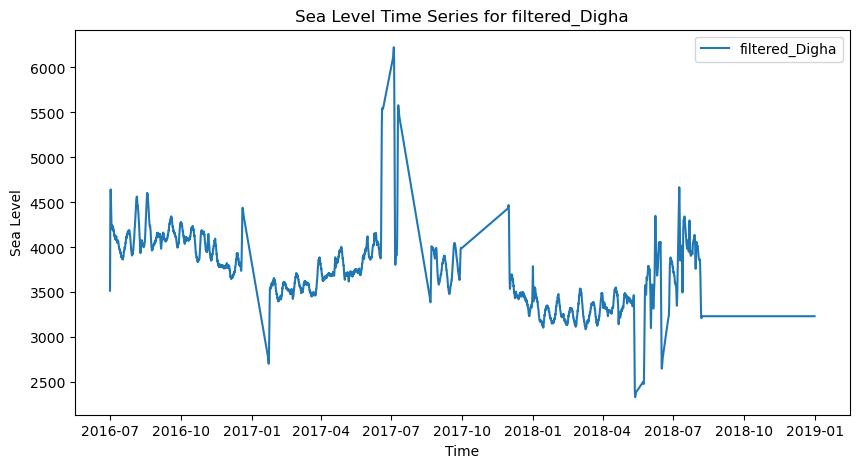

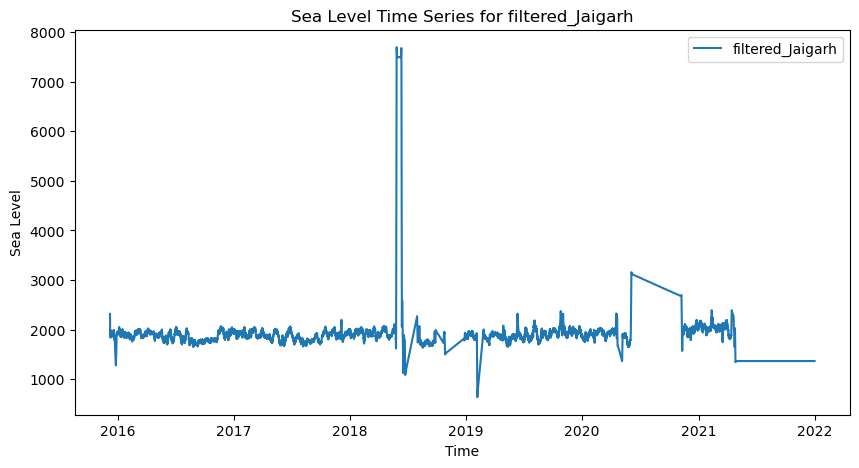

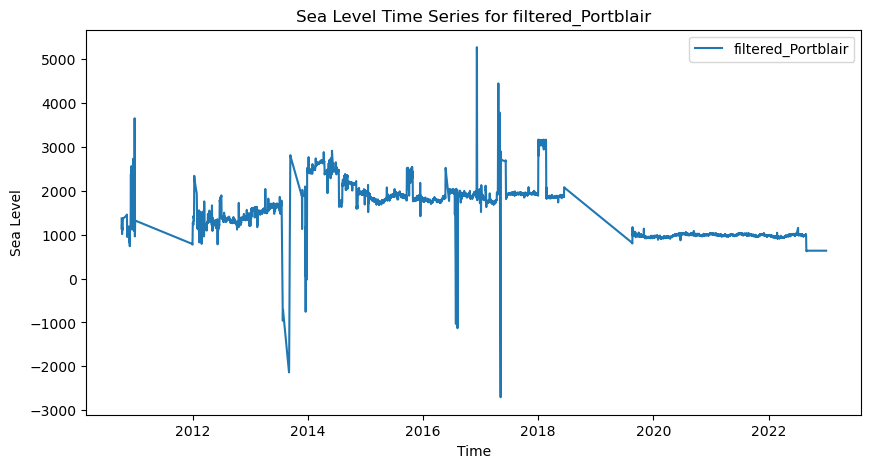

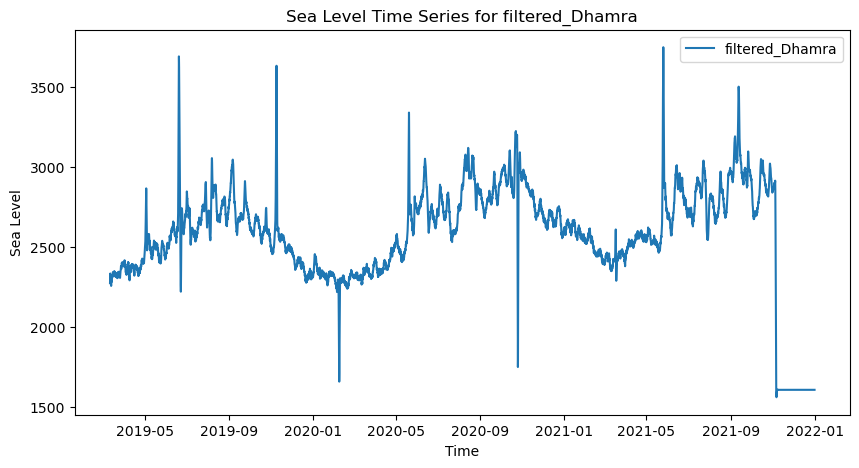

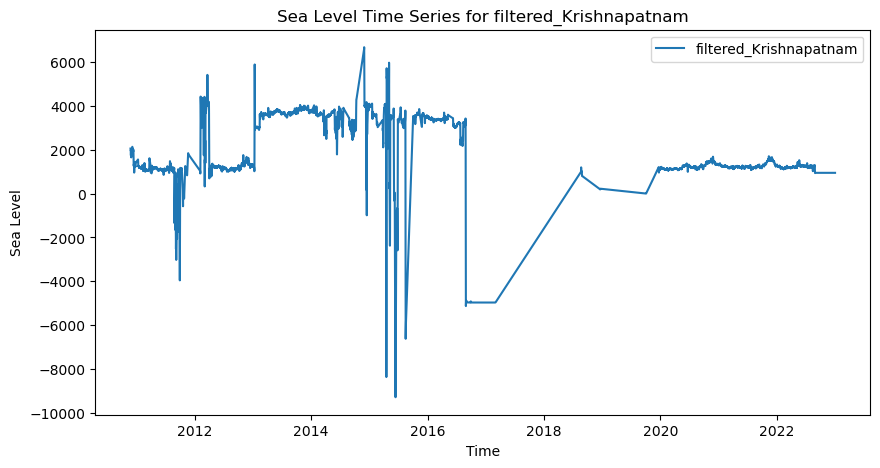

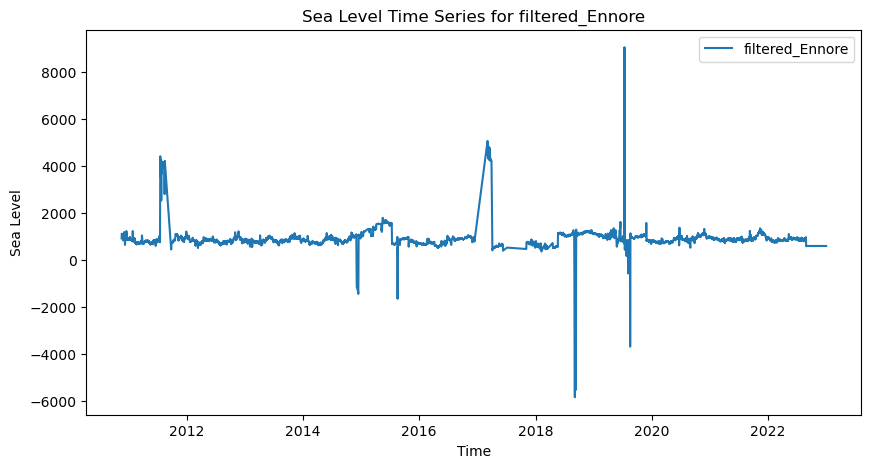

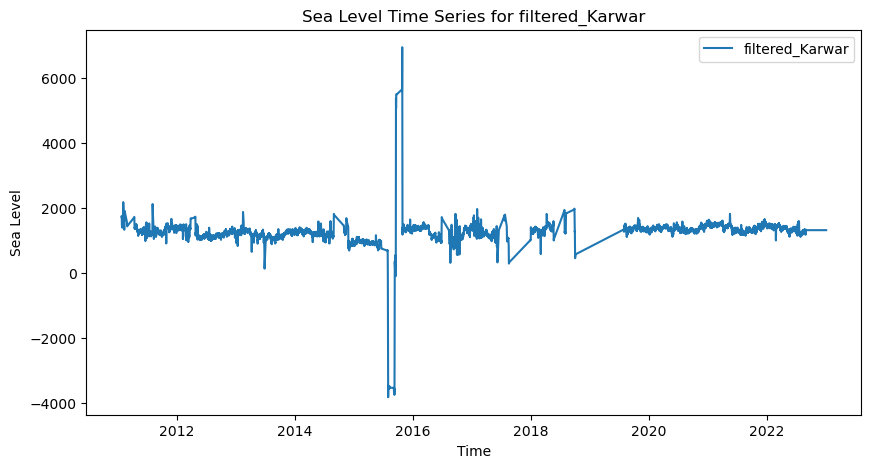

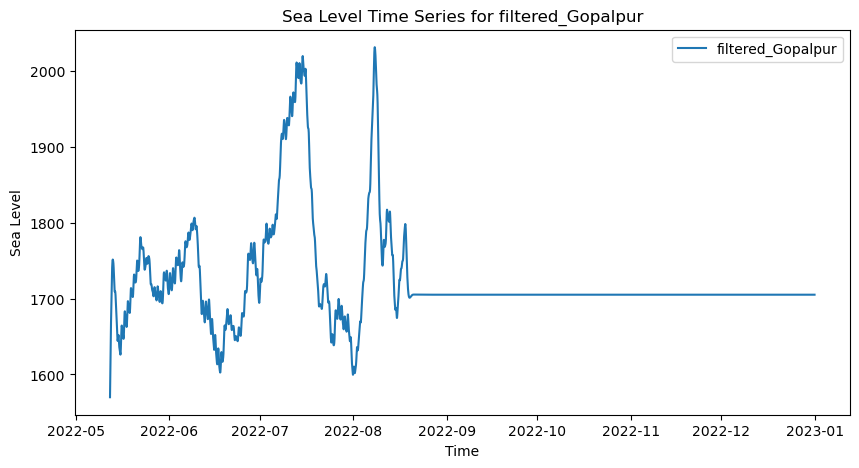

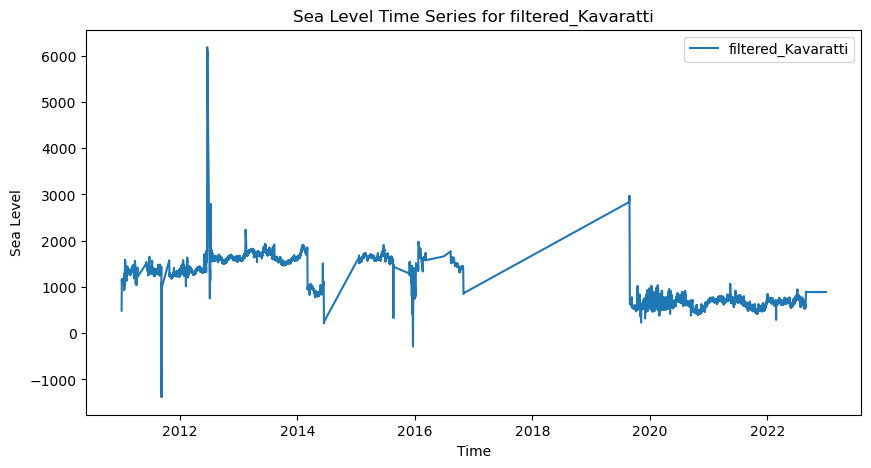

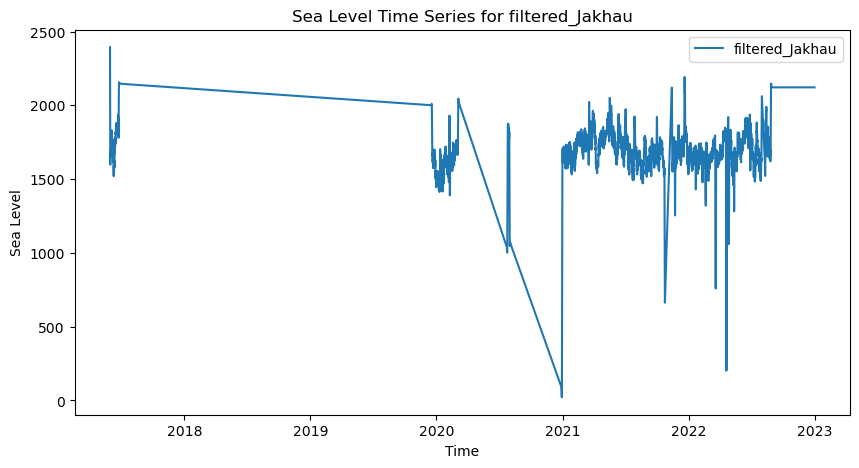

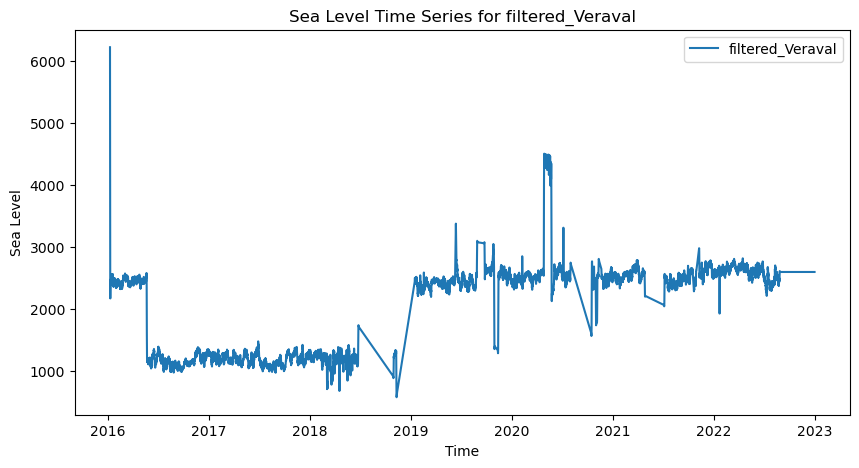

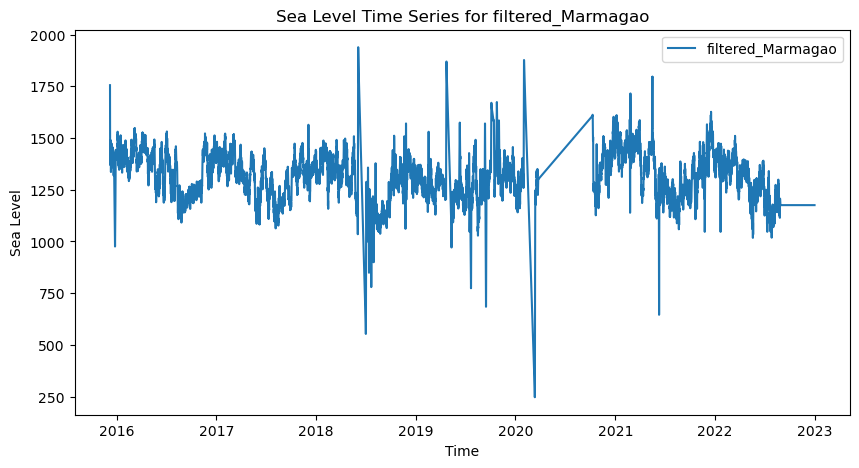

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
# Directory containing the CSV files
directory = 'filling'

# Loop through all files in the directory
for filename in os.listdir(directory):
    if filename.startswith('filtered_'):  # Check for CSV files
        file_path = os.path.join(directory, filename)
        df = pd.read_csv(file_path)  # Read the CSV file
        
        # Assuming the CSV file has columns 'Time' and 'Sl'
        df['Time'] = pd.to_datetime(df['Time'])  # Convert the 'Time' column to datetime
        plt.figure(figsize=(10, 5))  # Create a new figure for each plot
        plt.plot(df['Time'], df['Sl'], label=filename.replace('.csv', ''))  # Plot the data
        plt.xlabel('Time')
        plt.ylabel('Sea Level')
        plt.title(f'Sea Level Time Series for {filename.replace(".csv", "")}')
        plt.legend()
        plt.show()  # Show the plot

In [5]:


# Loop through the files in the directory
for filename in os.listdir(directory):
    if filename.endswith('.csv') and not filename.startswith('filtered_'):
        station_name = filename.replace('.csv', '')
        filtered_filename = f'filtered_{station_name}.csv'
        
        # Read the original and filtered files
        df_original = pd.read_csv(os.path.join(directory, filename), index_col='Time', parse_dates=['Time'])
        df_filtered = pd.read_csv(os.path.join(directory, filtered_filename), index_col='Time', parse_dates=['Time'])
        
        # Ensure the 'Time' indices are aligned
        df_filtered = df_filtered.reindex(df_original.index)
        
        # Copy NaNs from 'Sl' column of original dataframe to filtered dataframe
        df_filtered['Sl'] = df_filtered['Sl'].where(~df_original['Sl'].isna(), other=np.nan)

        # Save the updated filtered DataFrame
        df_filtered.to_csv(os.path.join(directory, filtered_filename))


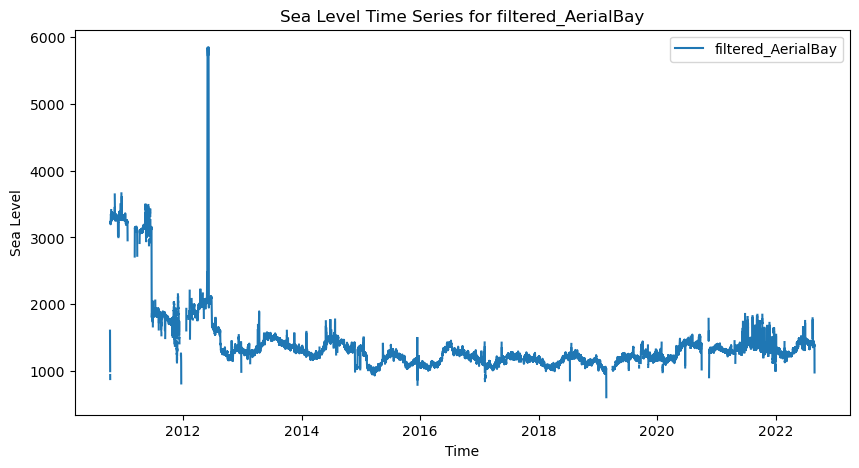

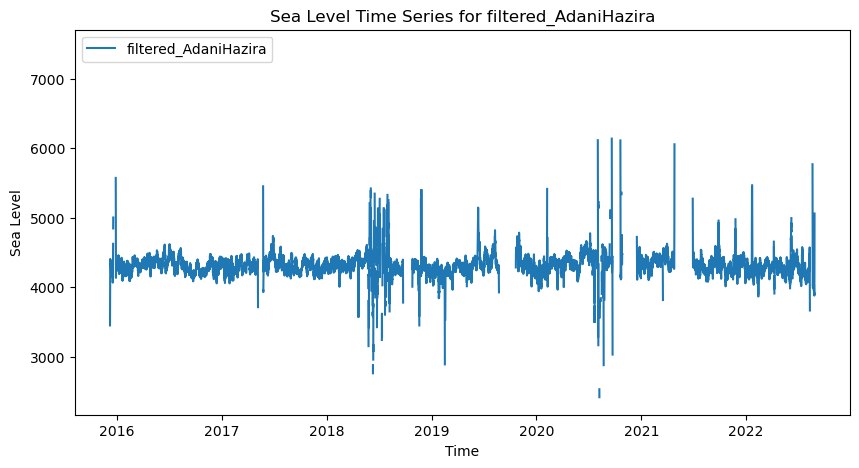

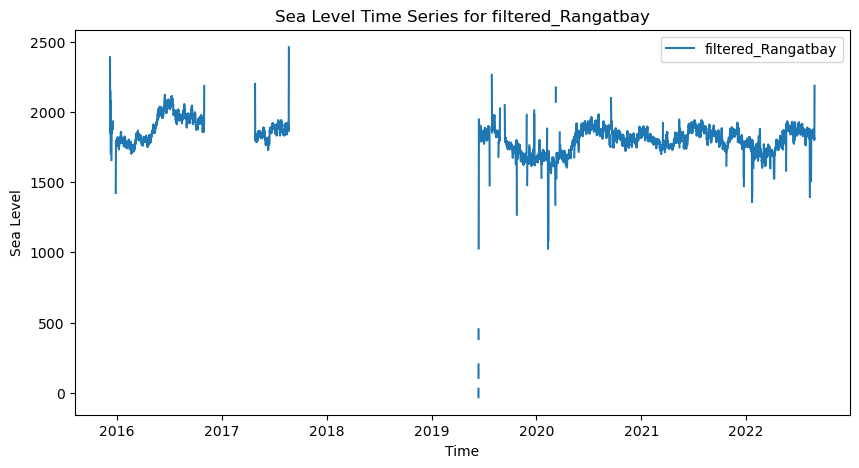

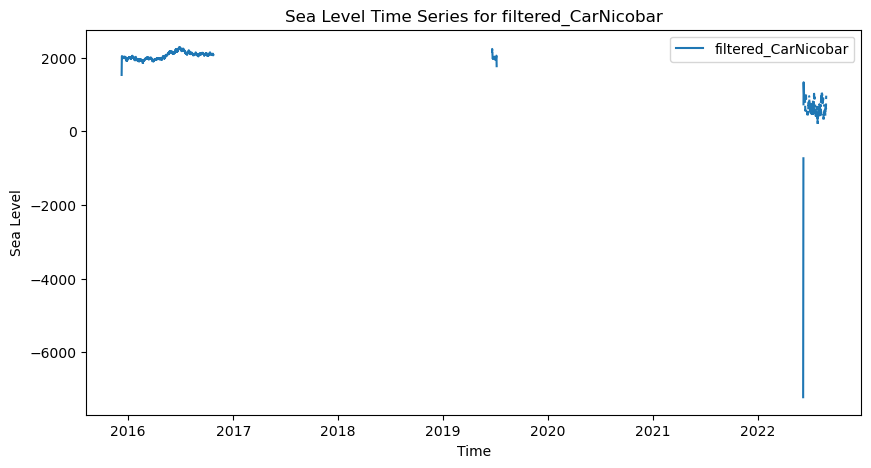

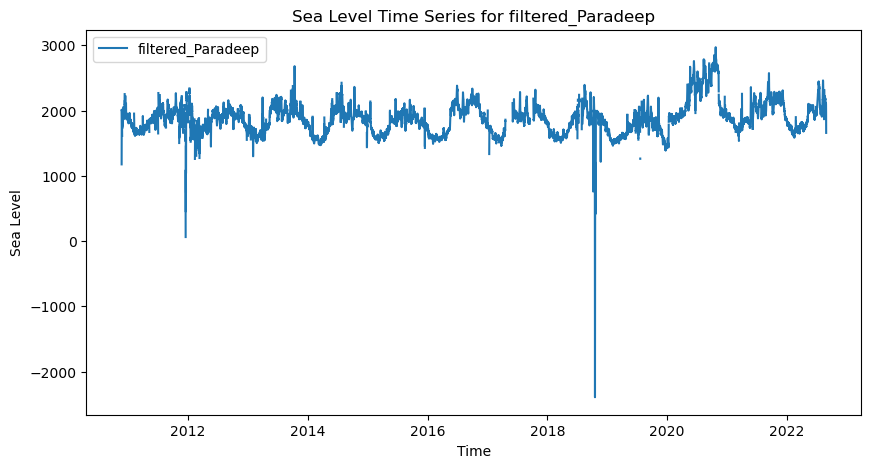

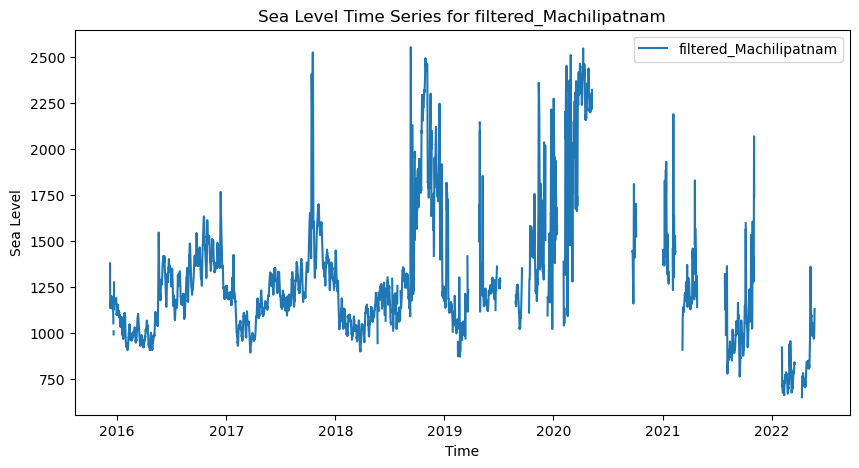

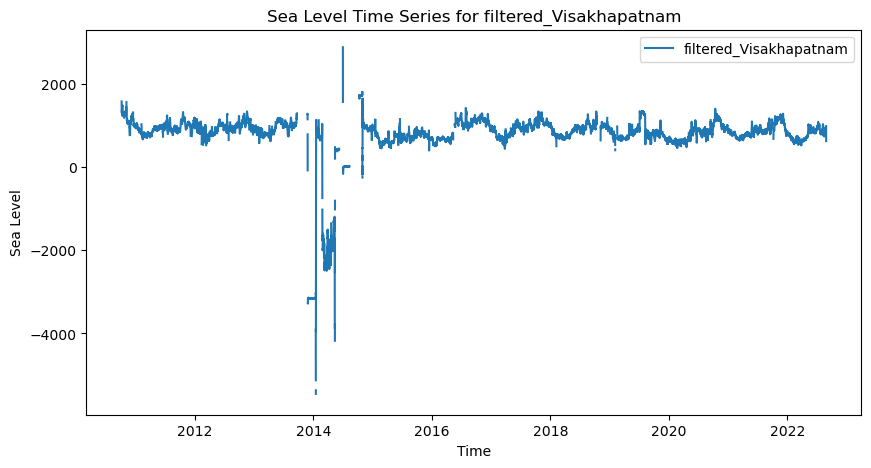

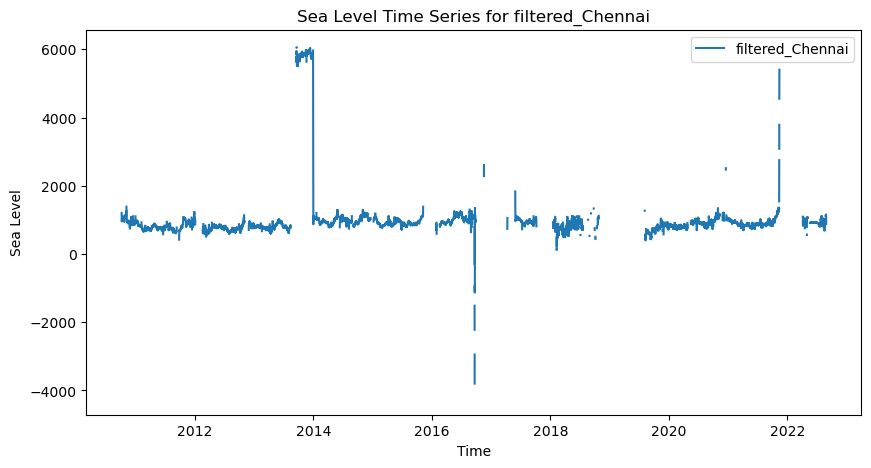

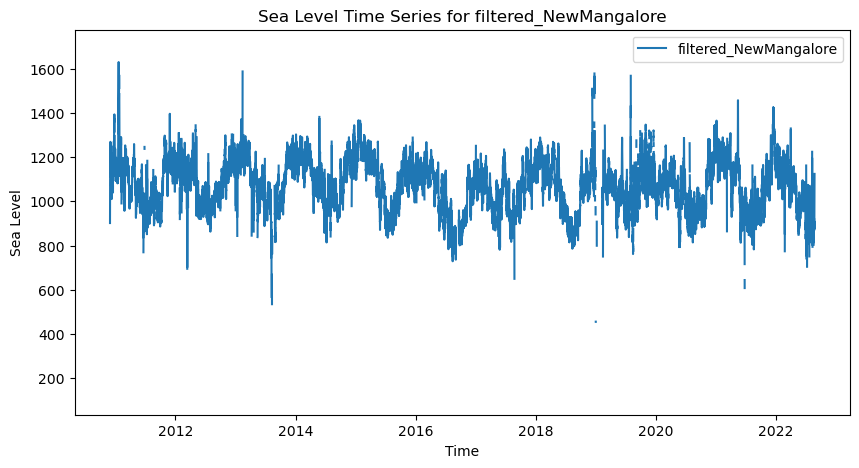

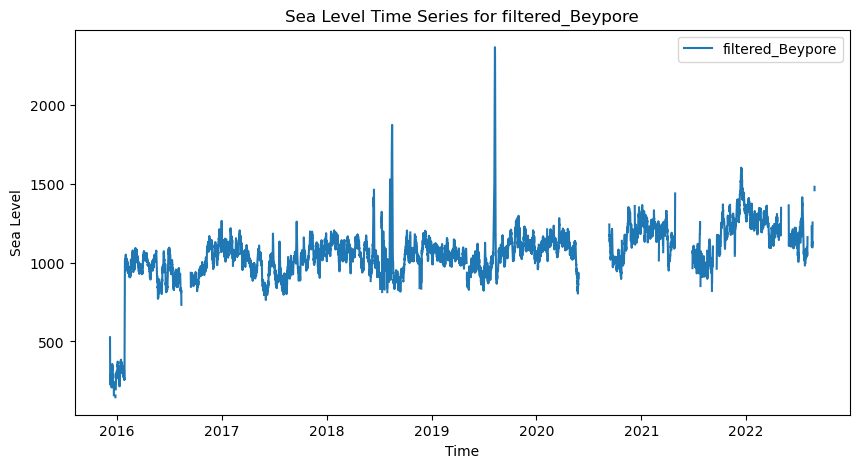

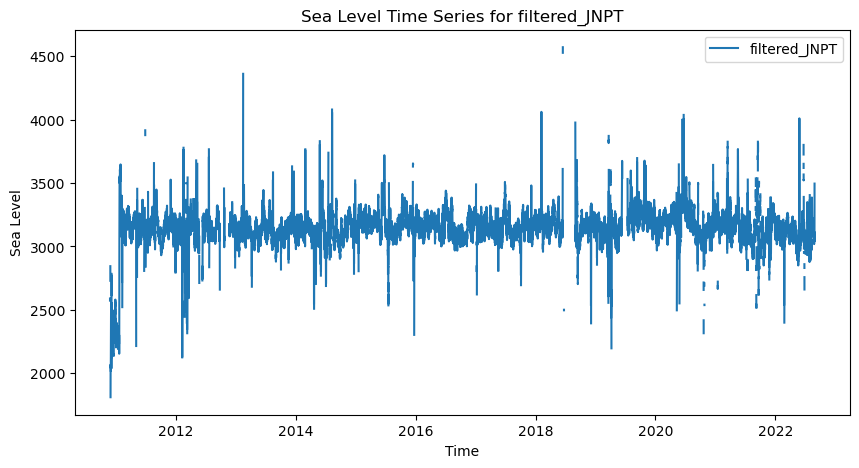

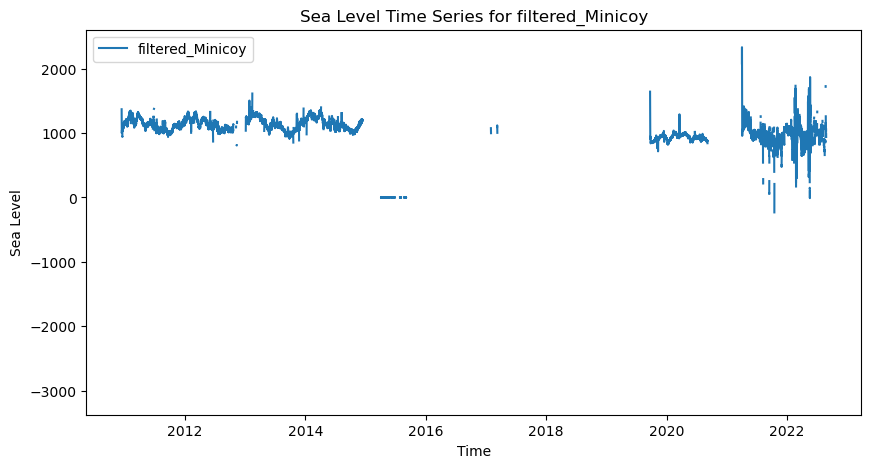

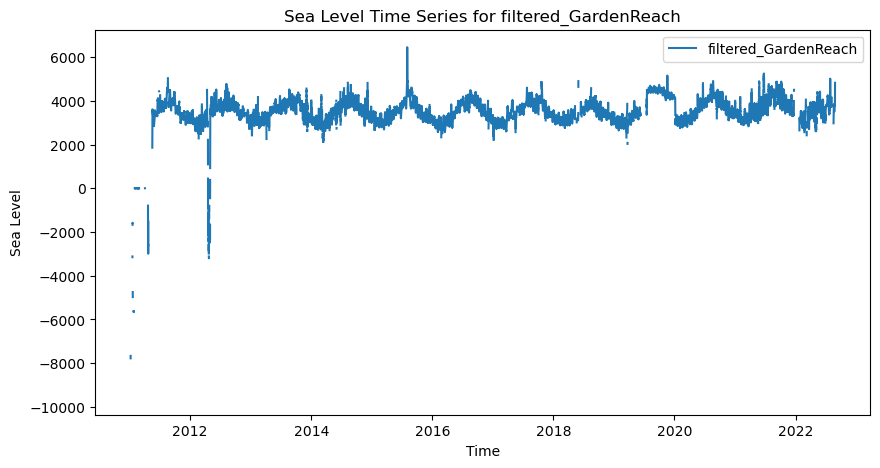

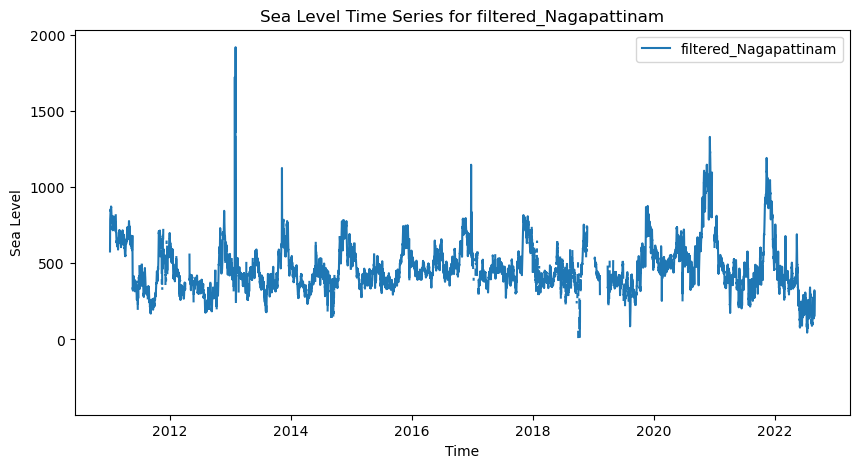

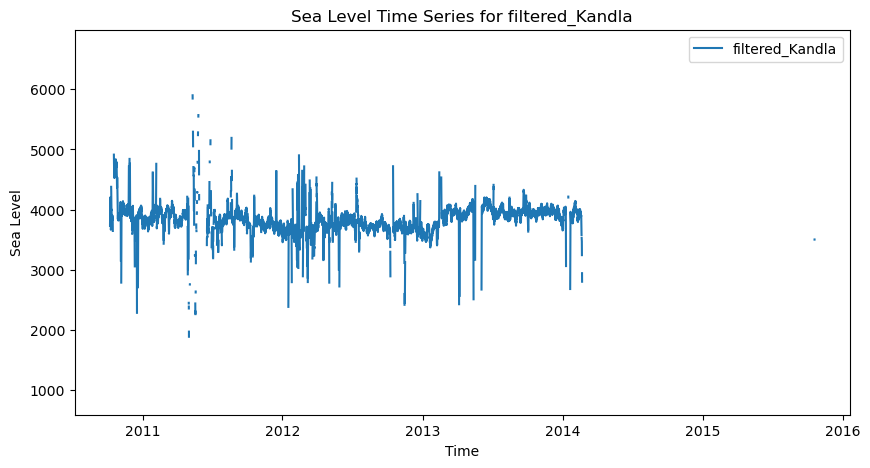

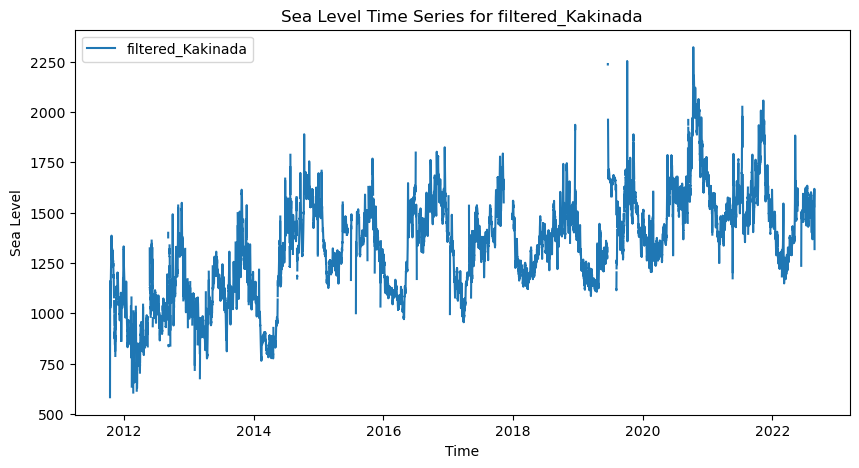

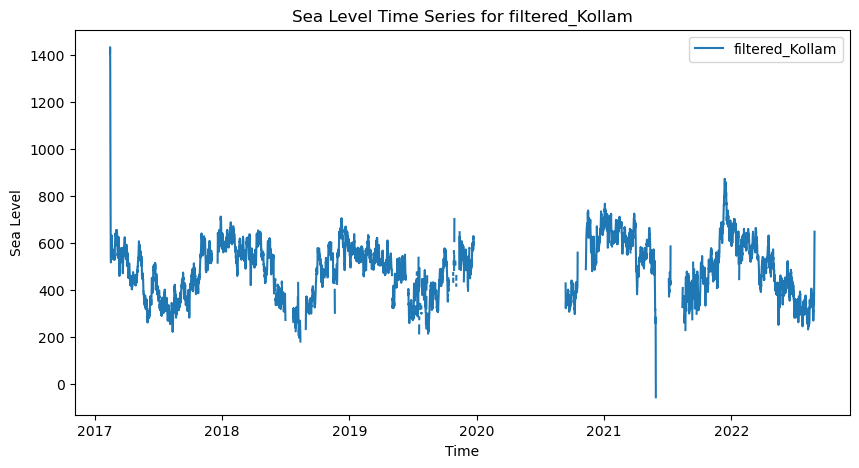

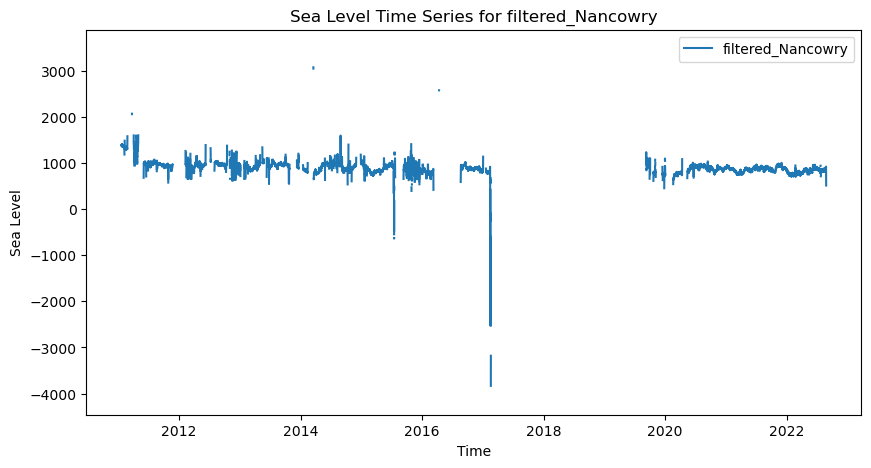

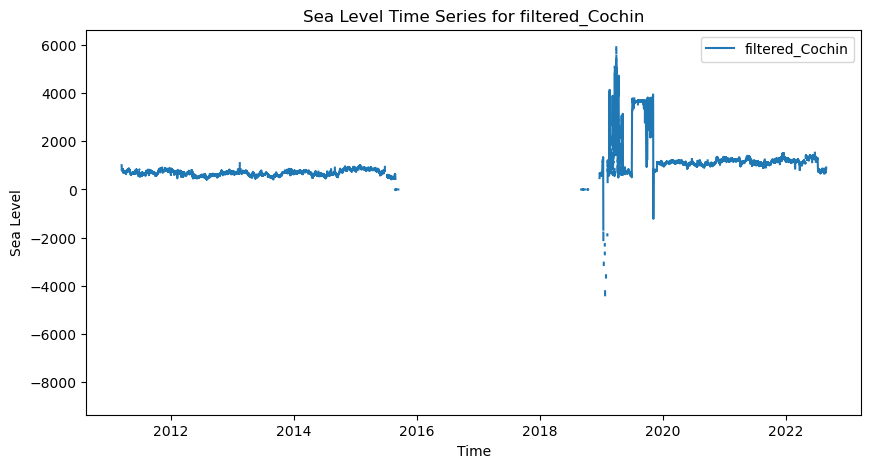

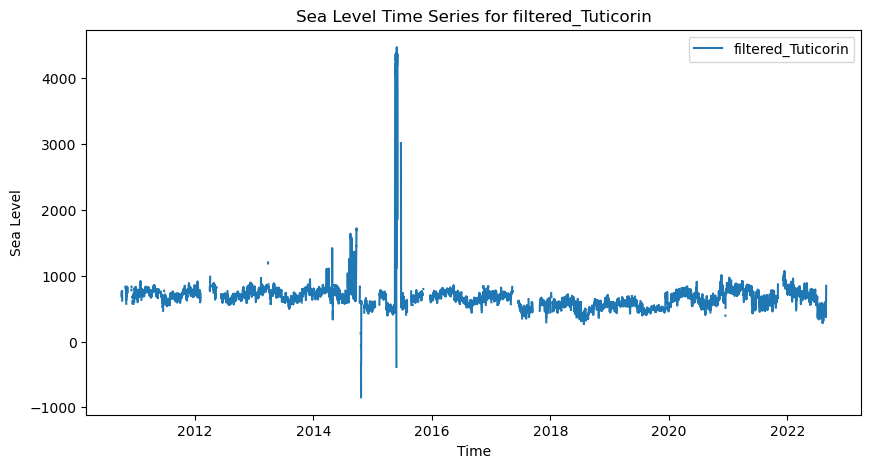

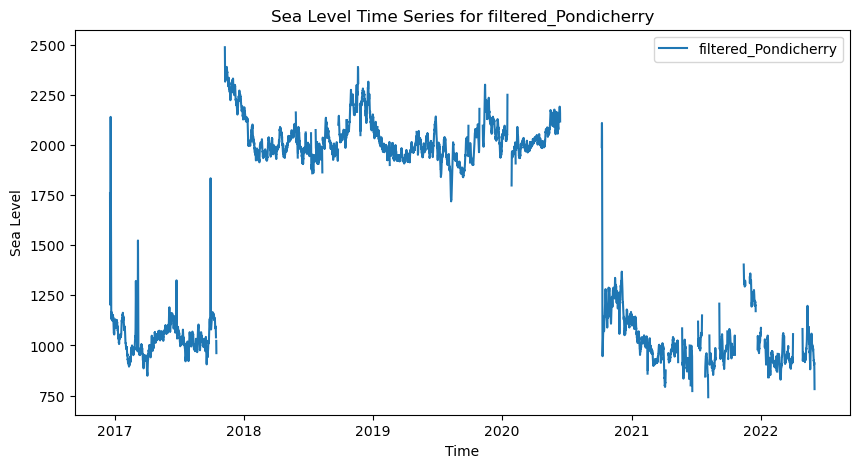

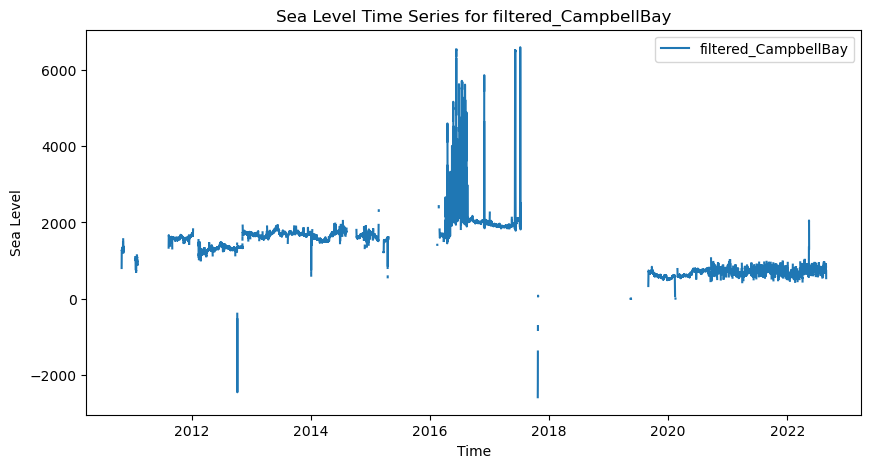

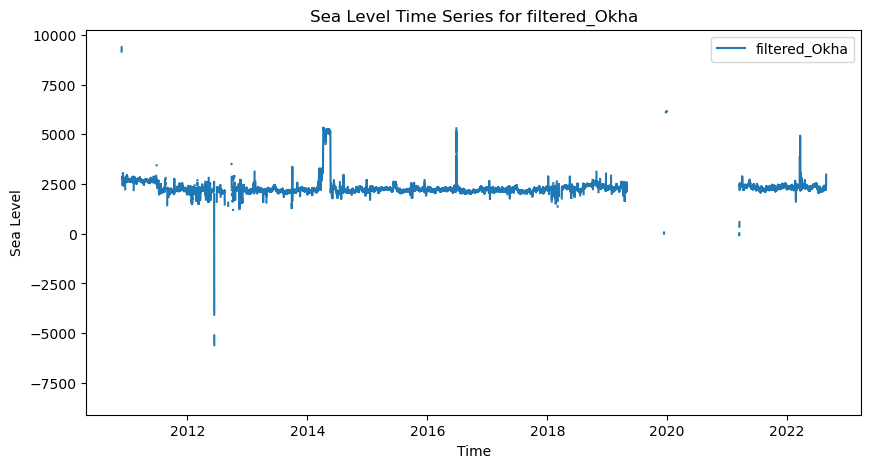

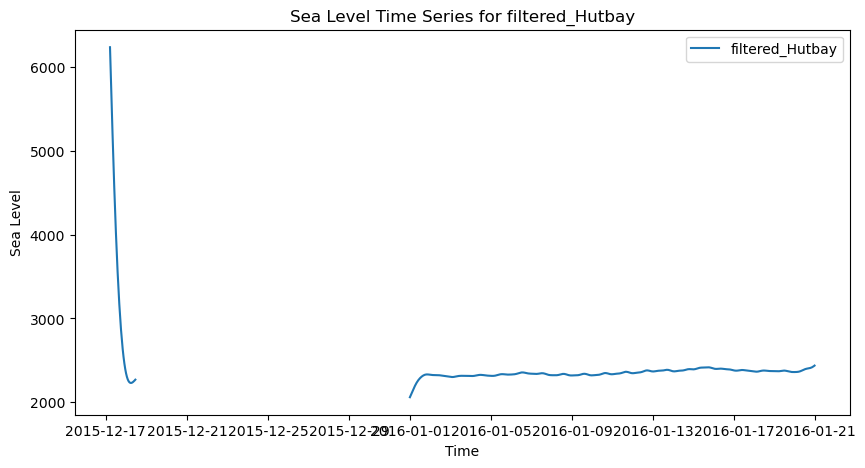

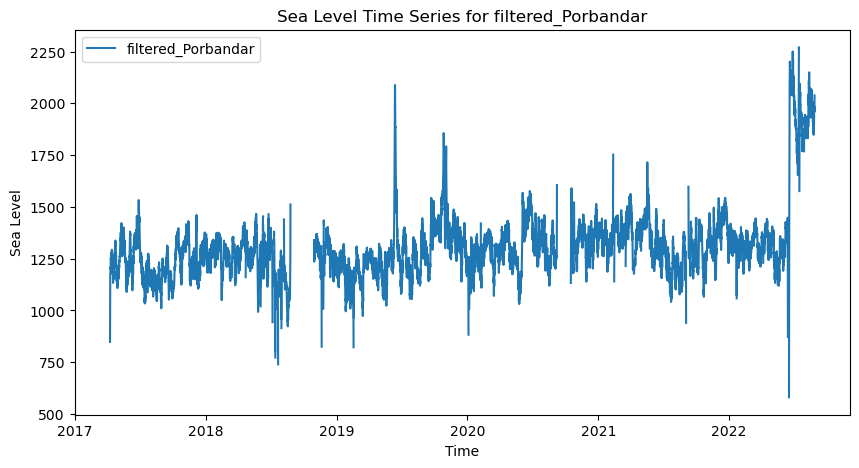

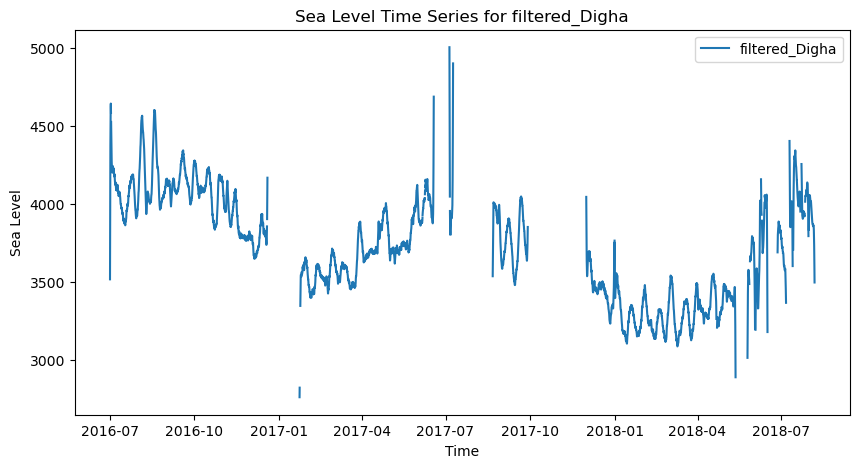

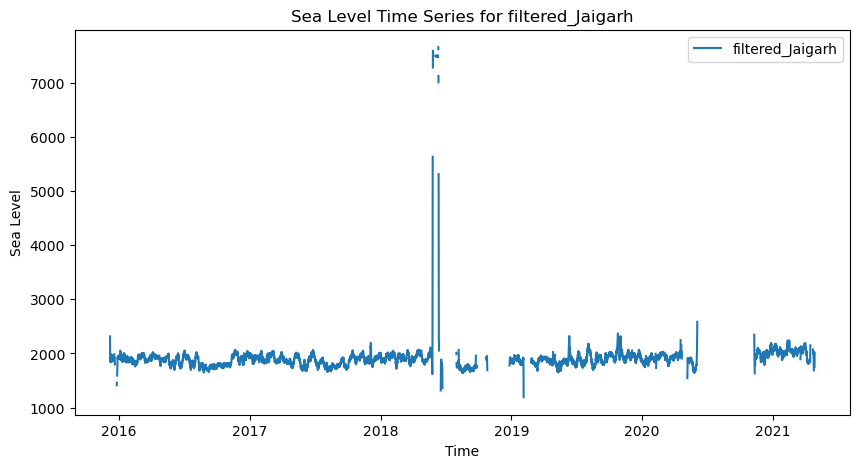

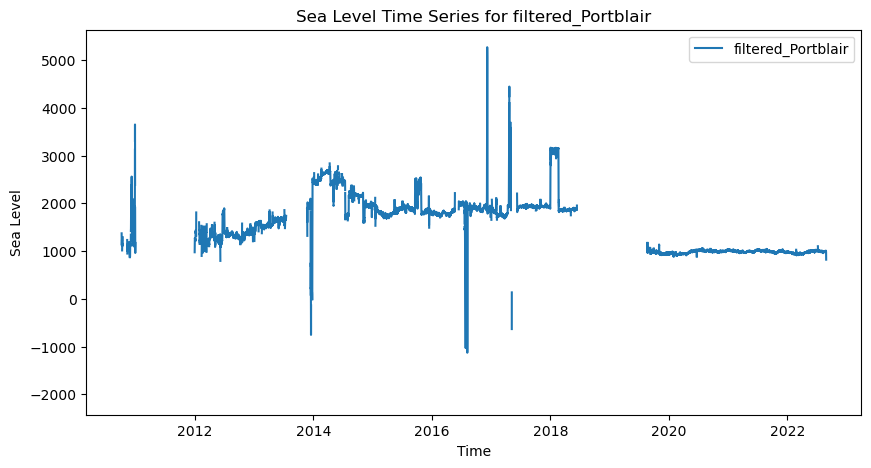

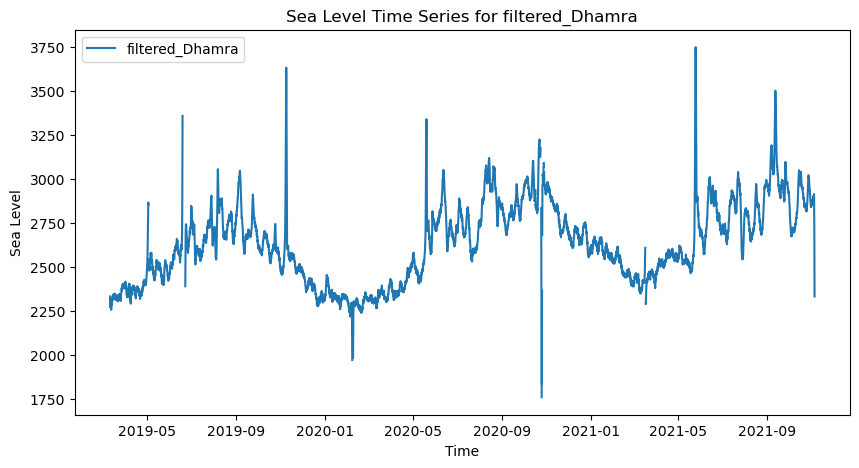

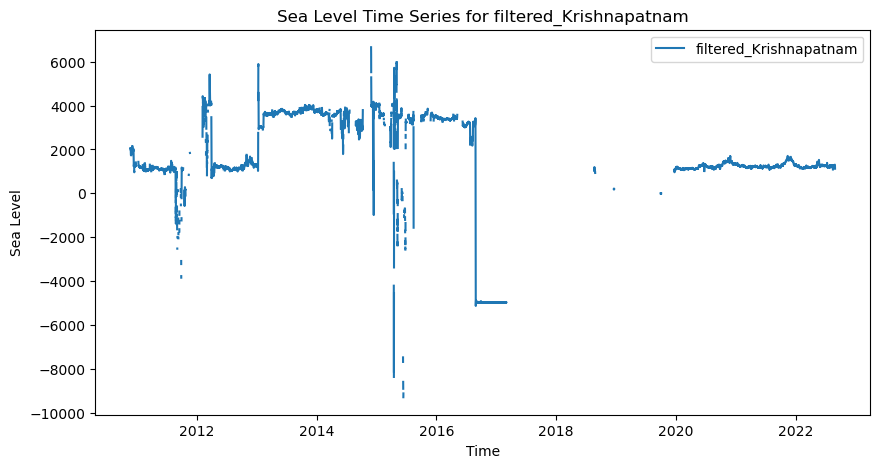

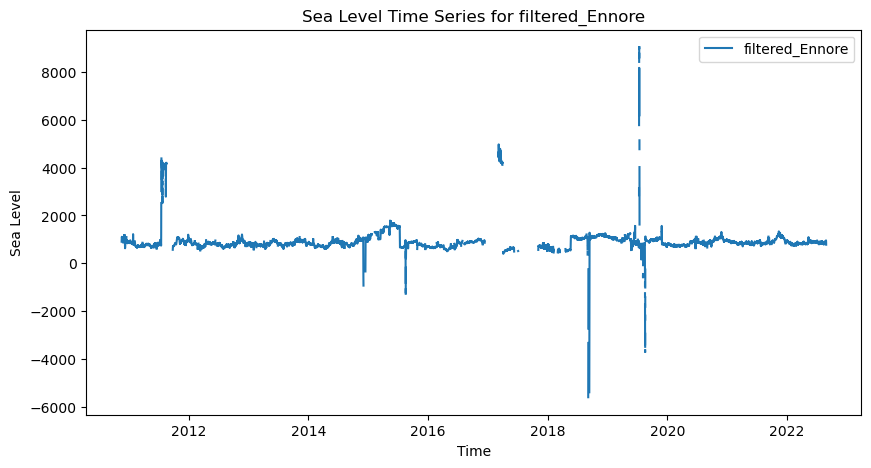

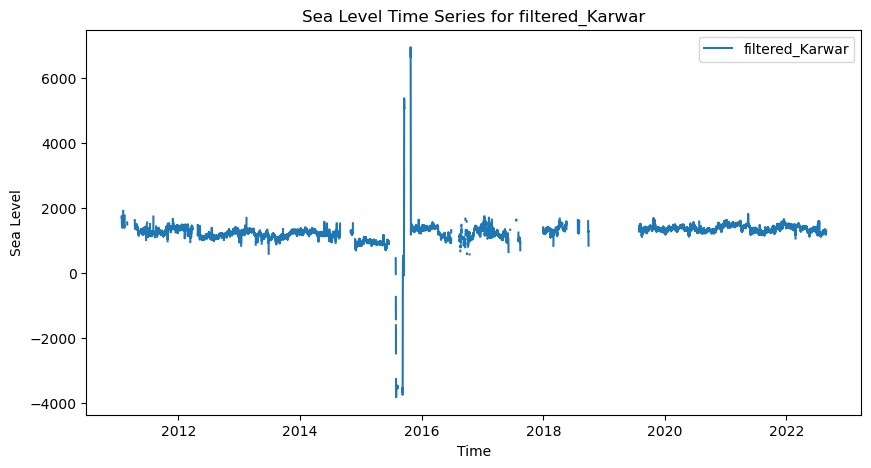

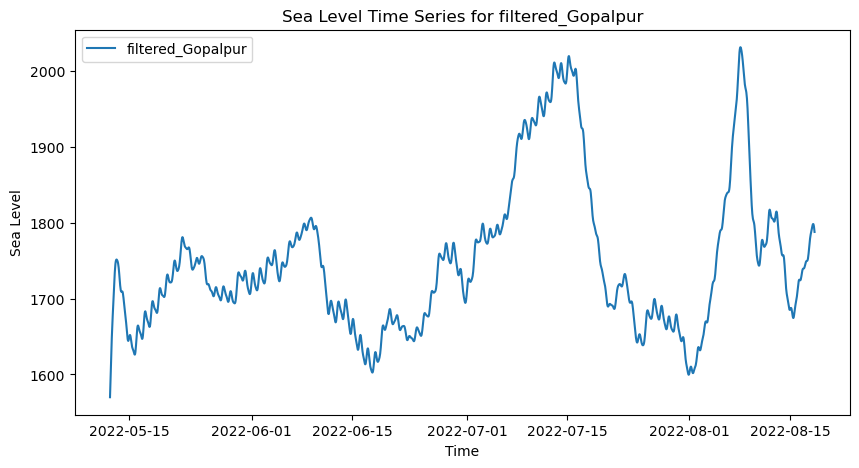

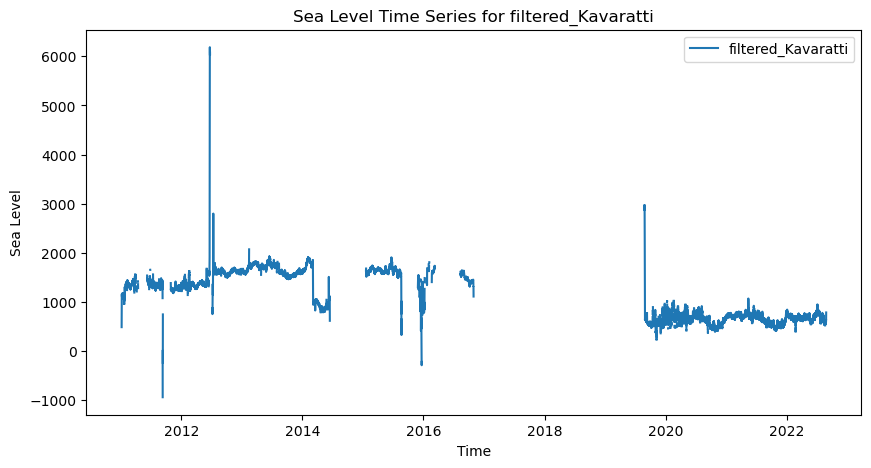

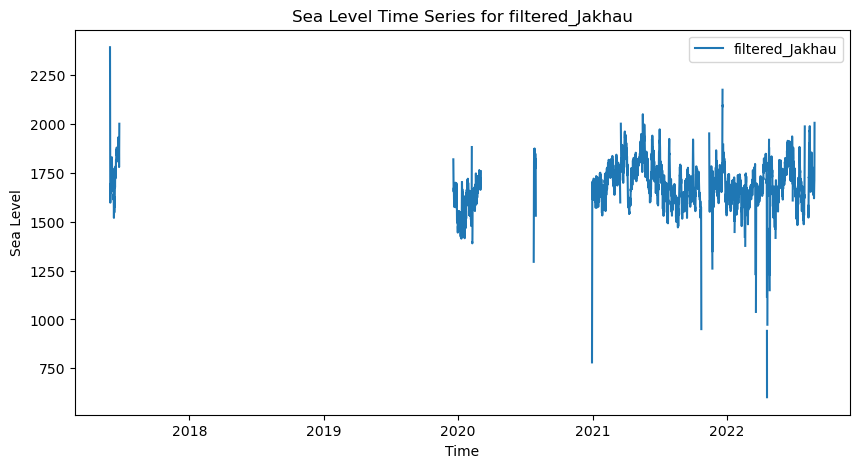

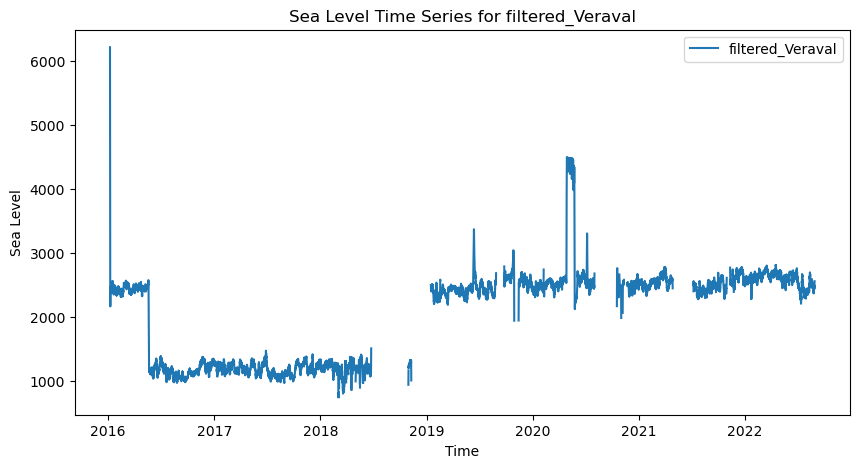

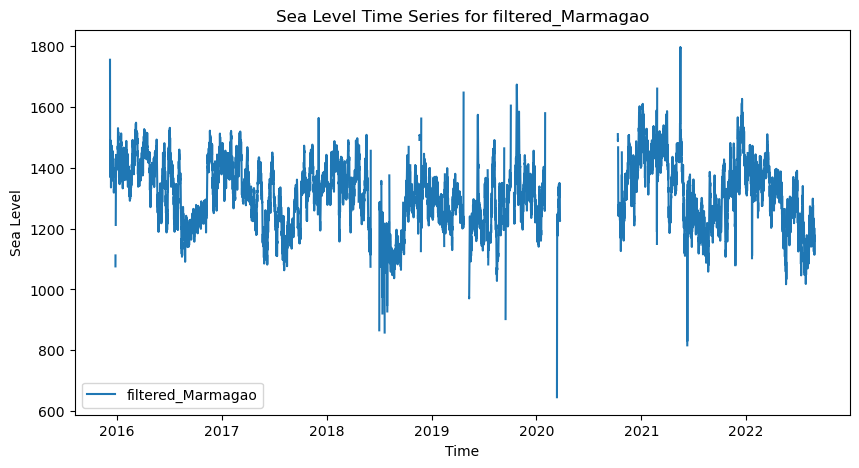

In [6]:
# Loop through all files in the directory
for filename in os.listdir(directory):
    if filename.startswith('filtered_'):  # Check for CSV files
        file_path = os.path.join(directory, filename)
        df = pd.read_csv(file_path)  # Read the CSV file
        
        # Assuming the CSV file has columns 'Time' and 'Sl'
        df['Time'] = pd.to_datetime(df['Time'])  # Convert the 'Time' column to datetime
        plt.figure(figsize=(10, 5))  # Create a new figure for each plot
        plt.plot(df['Time'], df['Sl'], label=filename.replace('.csv', ''))  # Plot the data
        plt.xlabel('Time')
        plt.ylabel('Sea Level')
        plt.title(f'Sea Level Time Series for {filename.replace(".csv", "")}')
        plt.legend()
        plt.show()  # Show the plot

In [10]:
# Loop through each file path
for filename in os.listdir(directory):
    if filename.startswith('filtered_'):
        file_path = os.path.join(directory, filename)
        df = pd.read_csv(file_path, parse_dates=['Time'], index_col='Time')
        
        # Interpolate using a 3-day spline window
        df['Sl'] = df['Sl'].interpolate(method='spline', order=3, limit_direction='forward', limit=72)
        df['Sl']=df['Sl']-np.nanmean(df['Sl'])
        df['Sl'] = np.where((df['Sl'] < -1500) | (df['Sl'] > 1500), np.nan, df['Sl'])

        # Save the spline interpolated DataFrame back to CSV
        spline_interpolated_file_path = os.path.join(directory, 'spline_interpolated_' + filename)
        df.to_csv(spline_interpolated_file_path)

print("Spline interpolation completed for all filtered stations.")

Spline interpolation completed for all filtered stations.


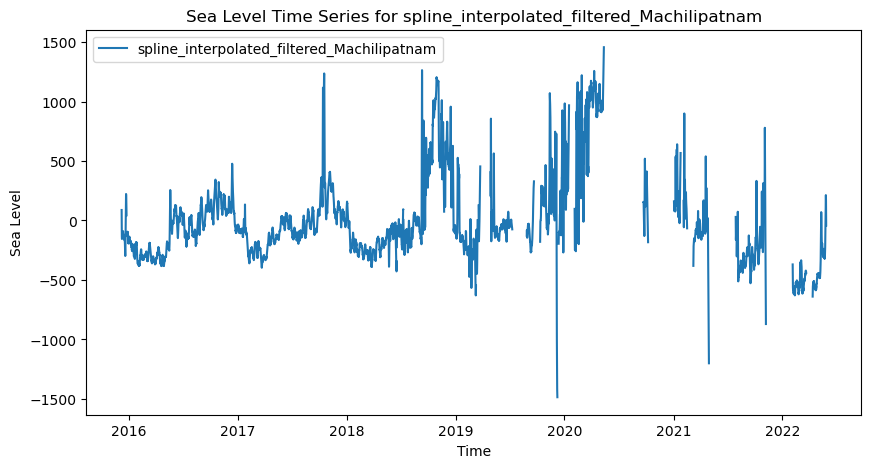

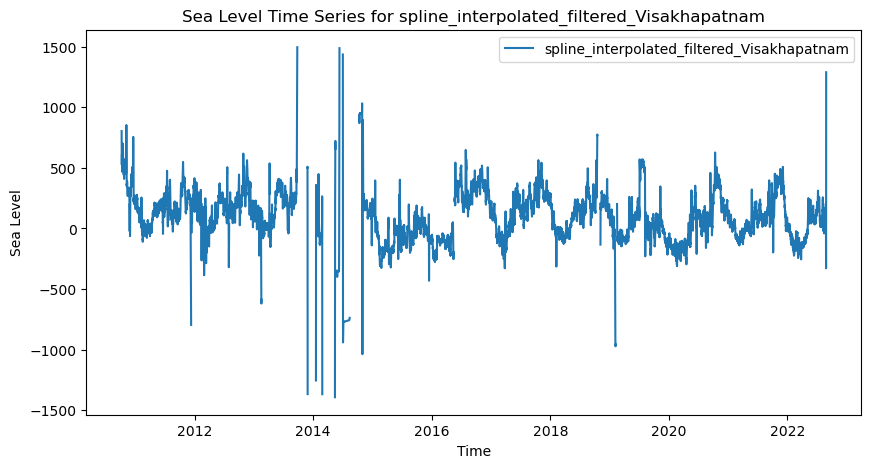

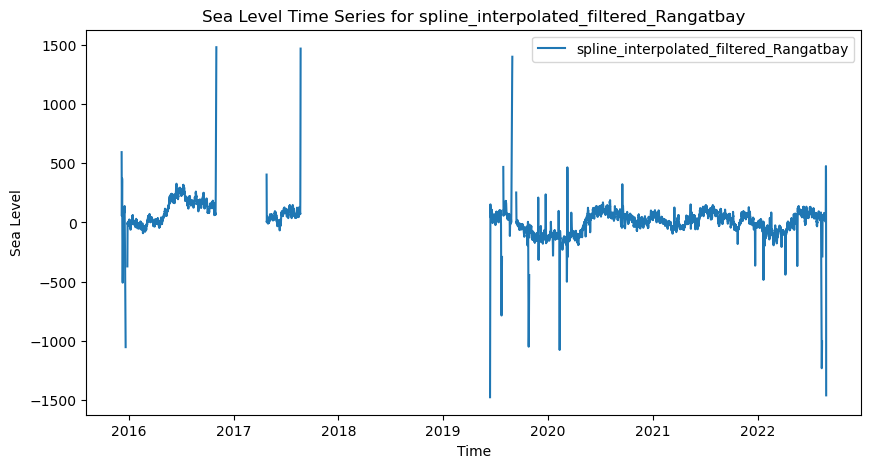

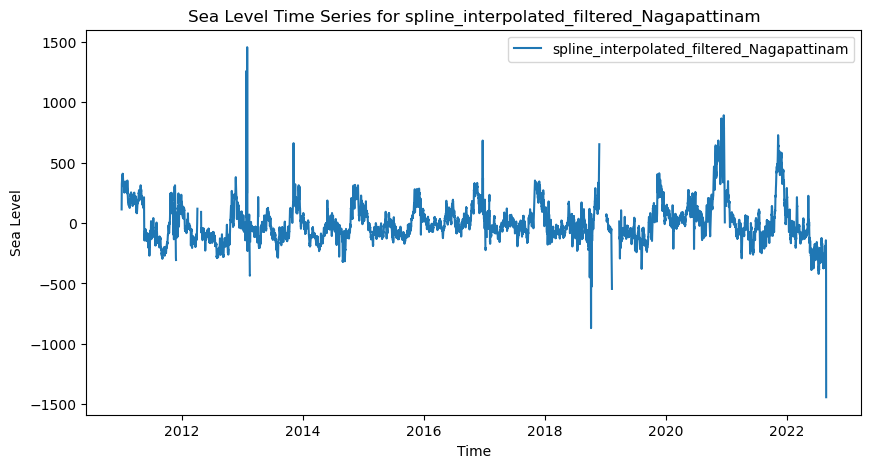

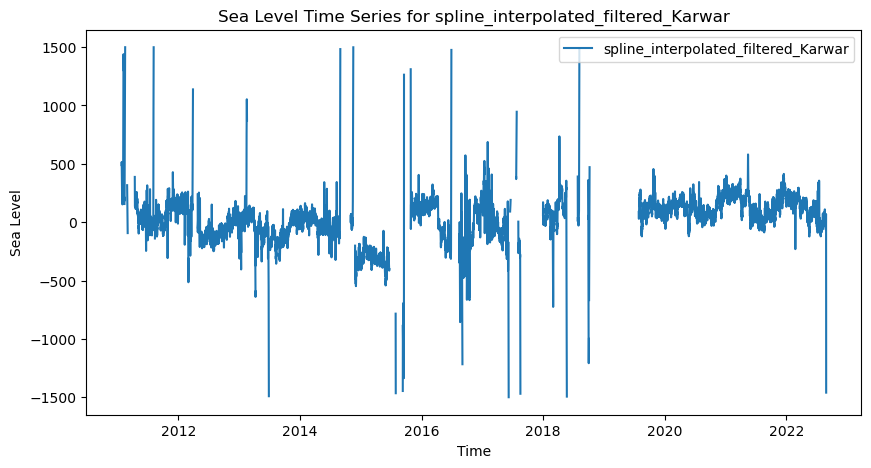

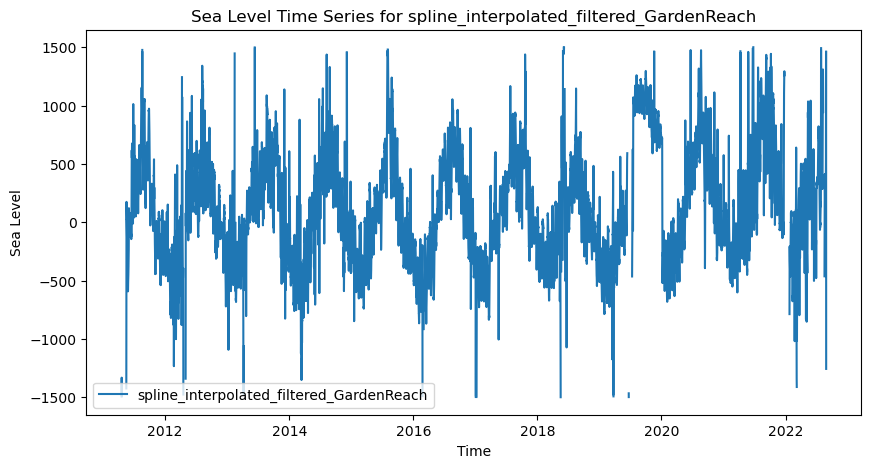

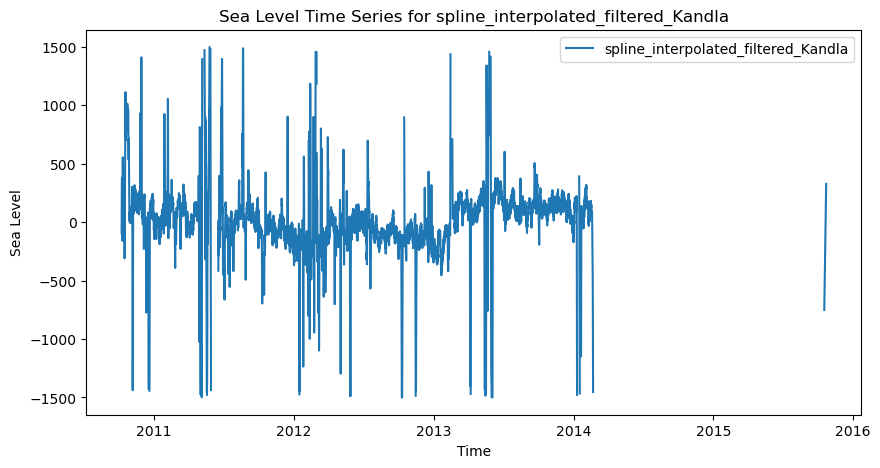

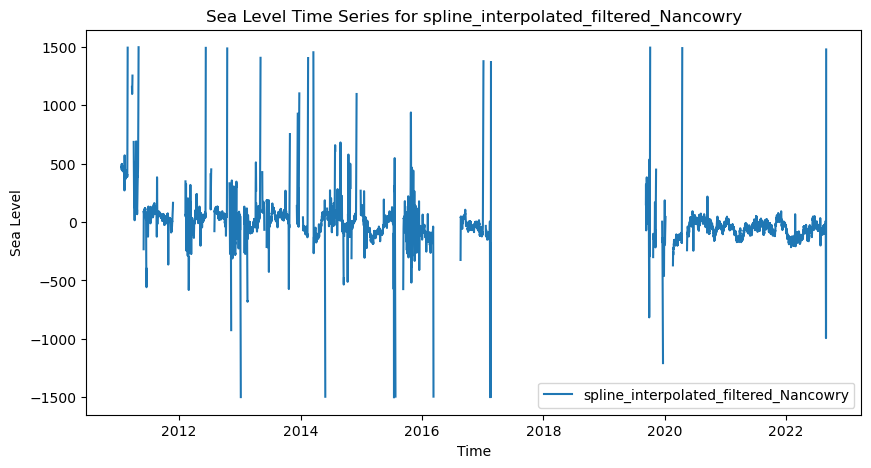

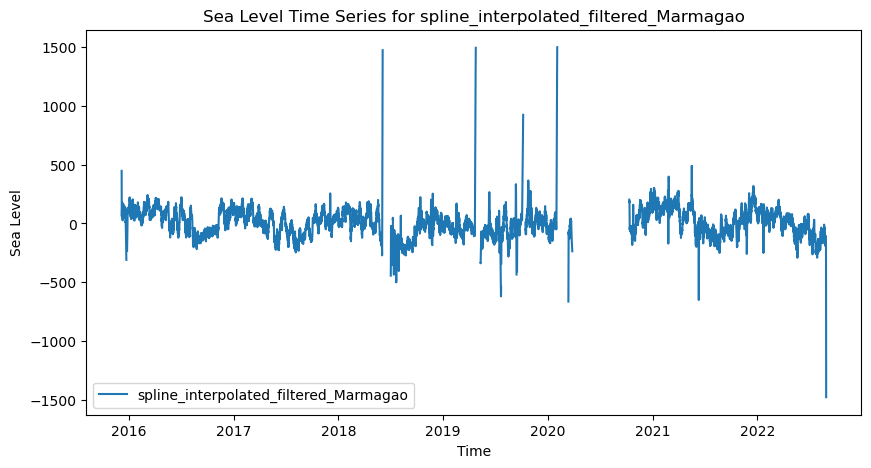

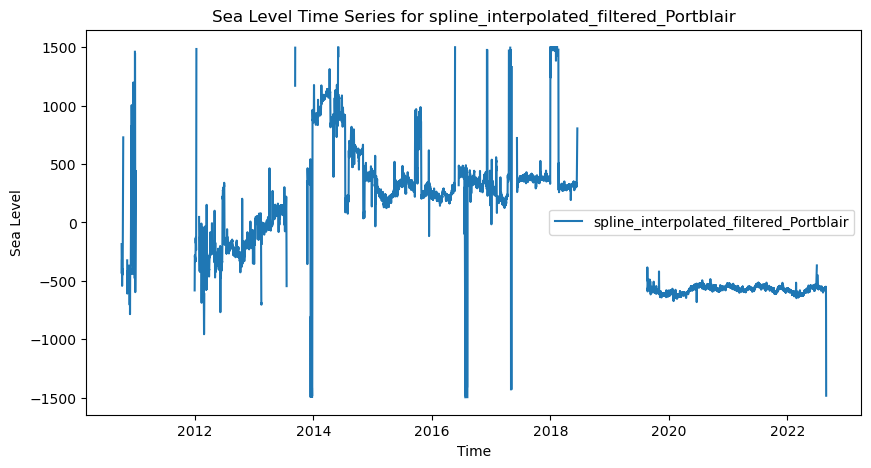

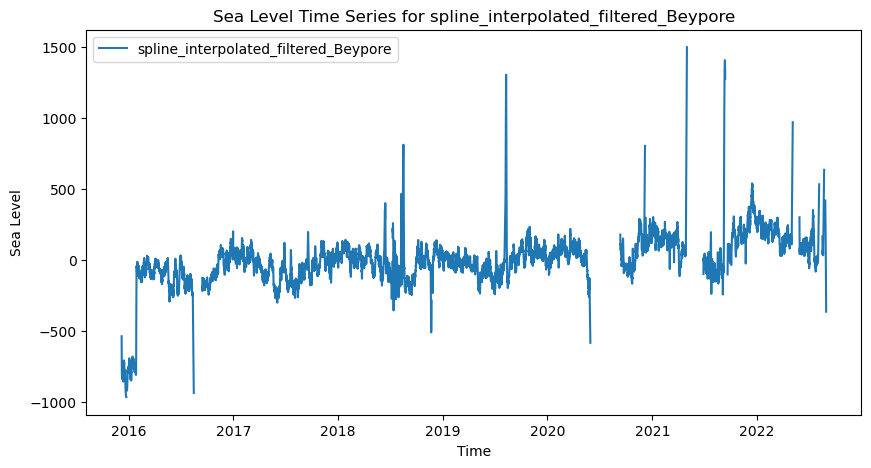

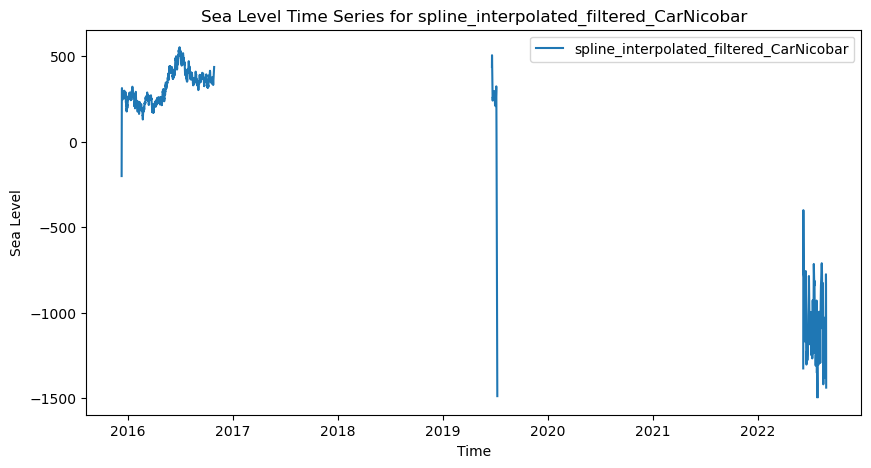

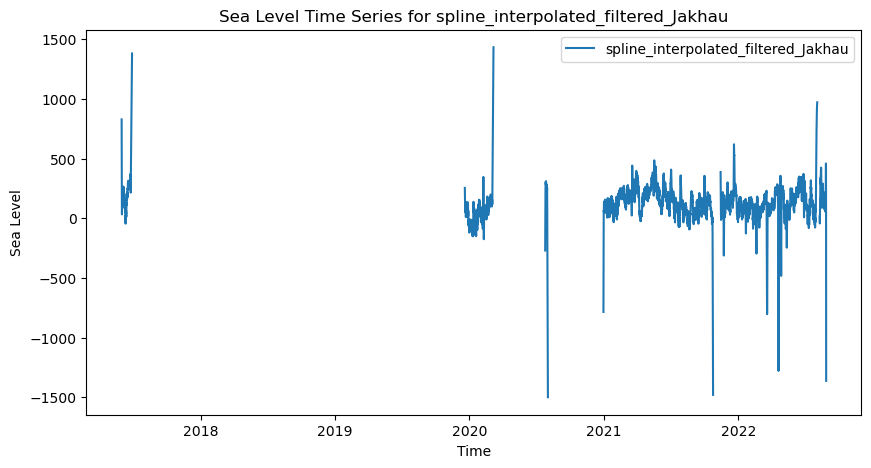

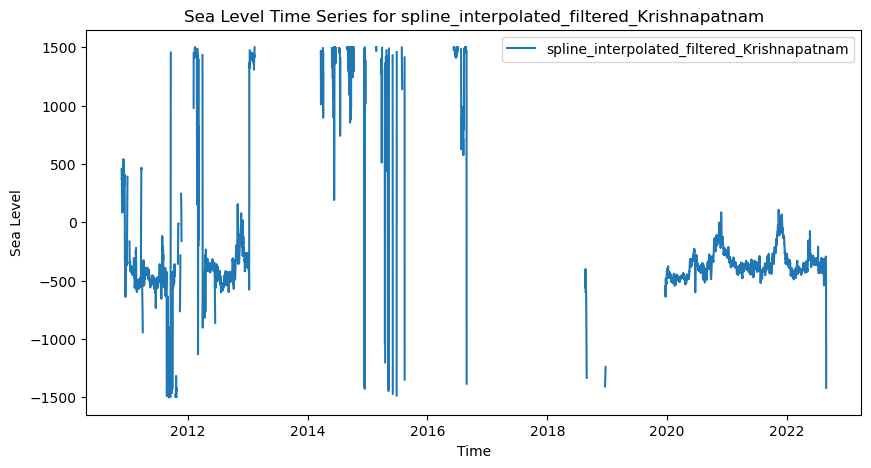

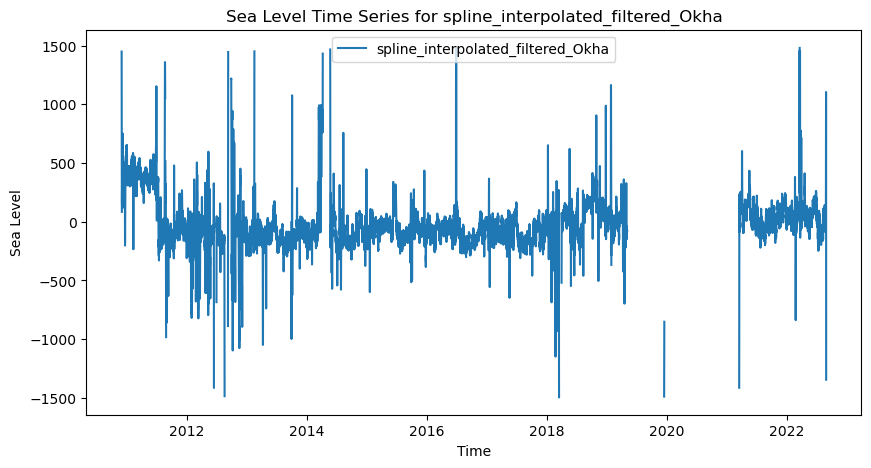

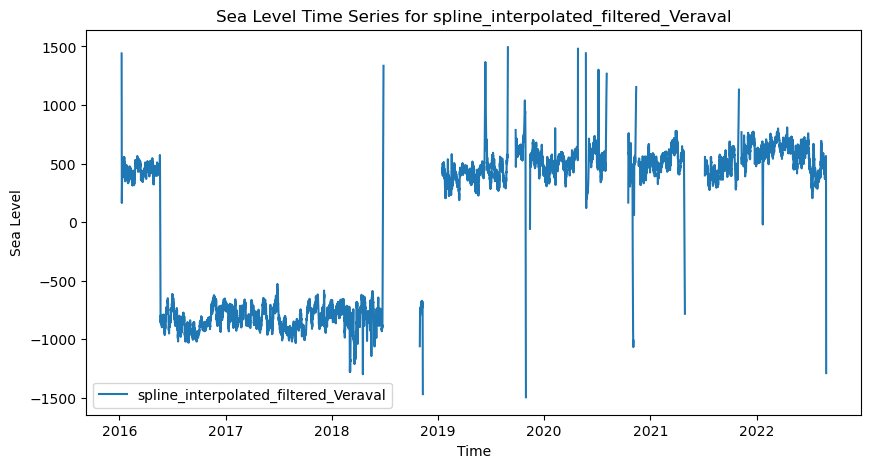

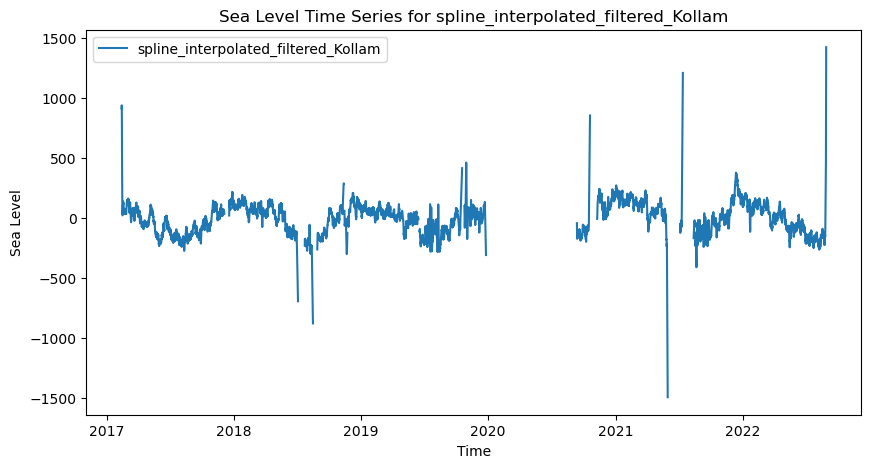

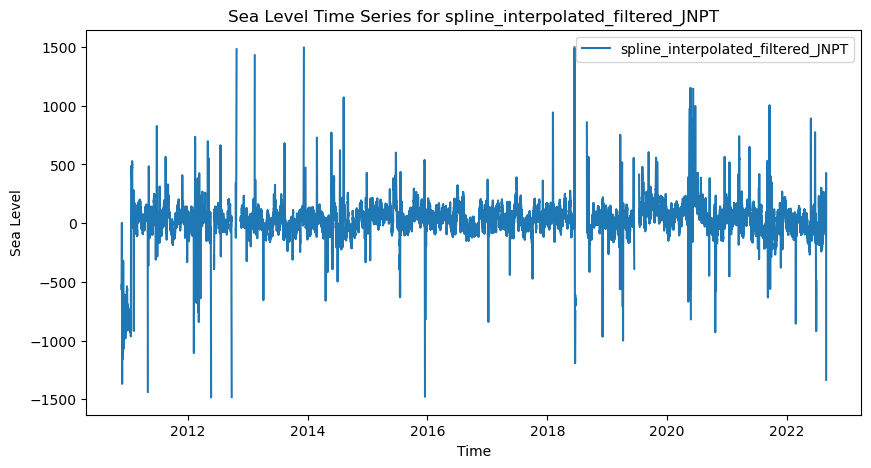

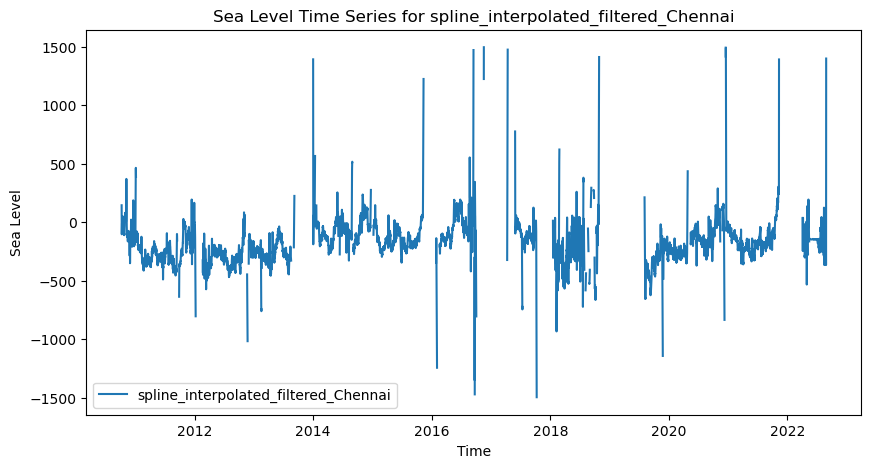

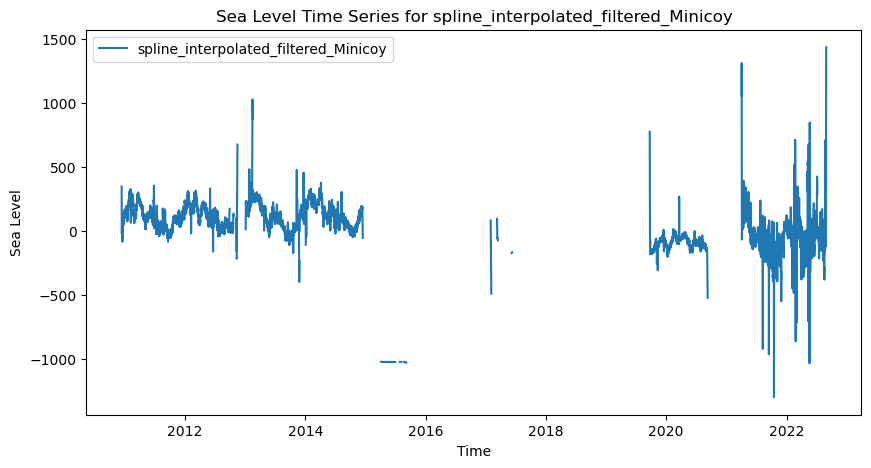

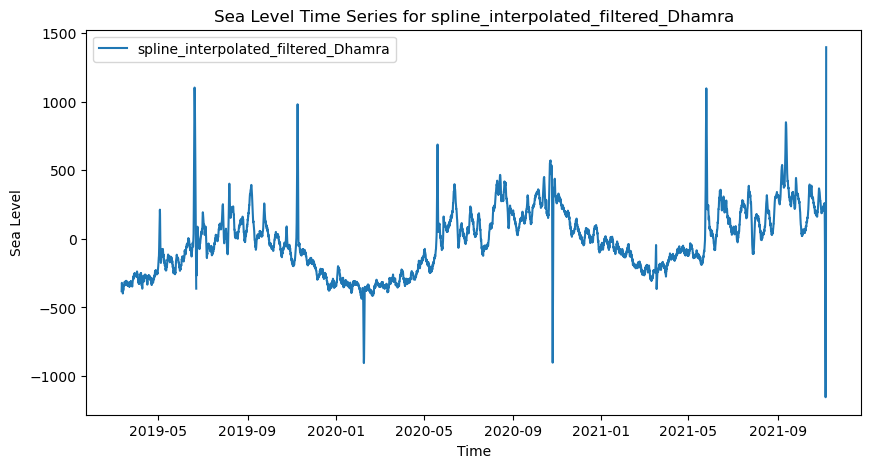

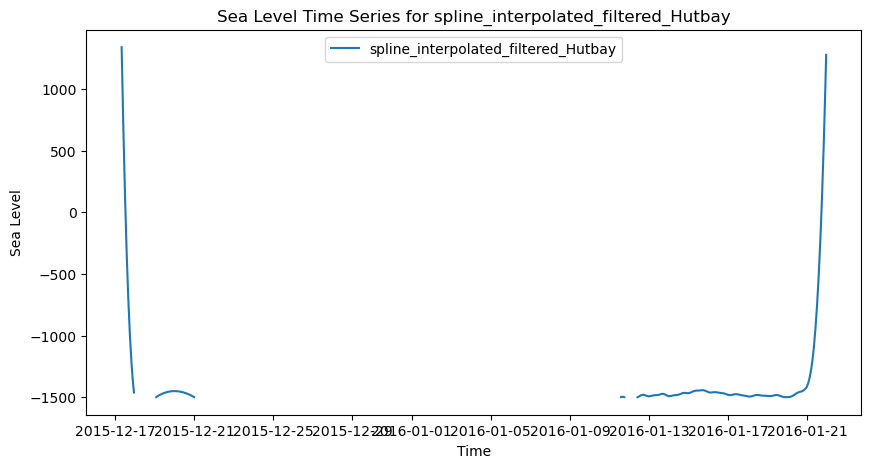

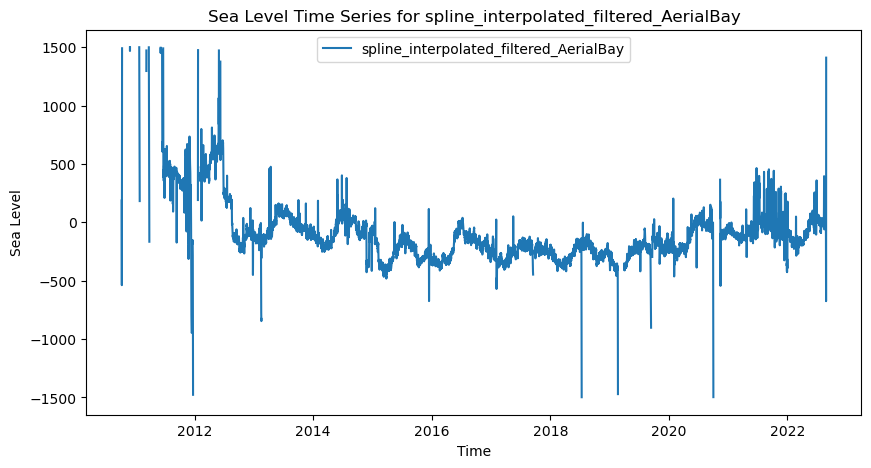

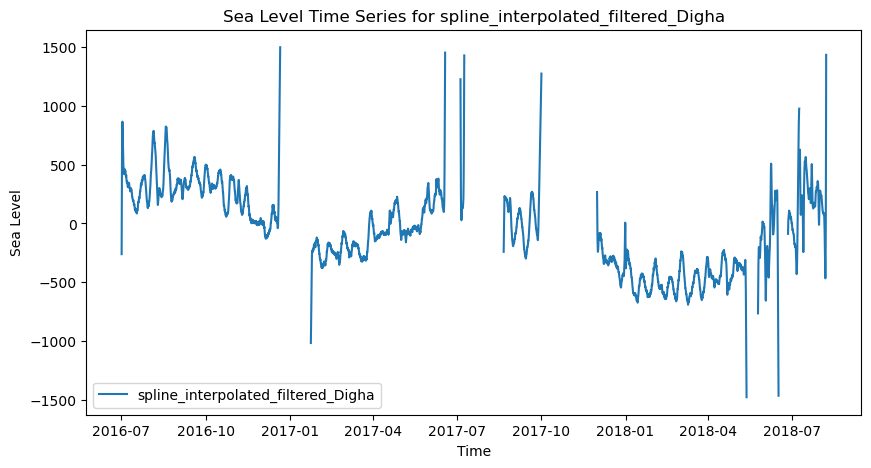

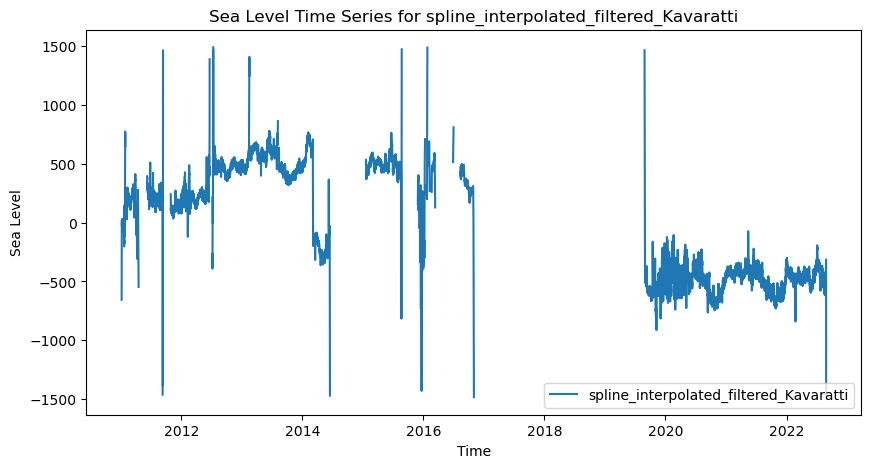

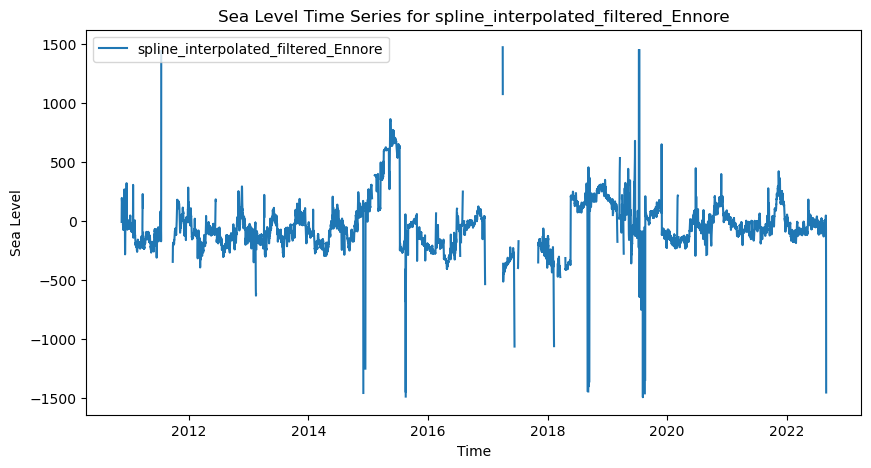

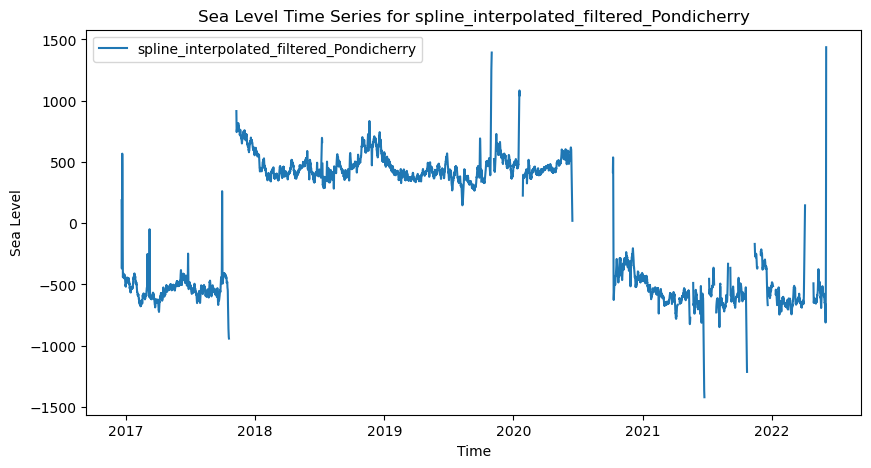

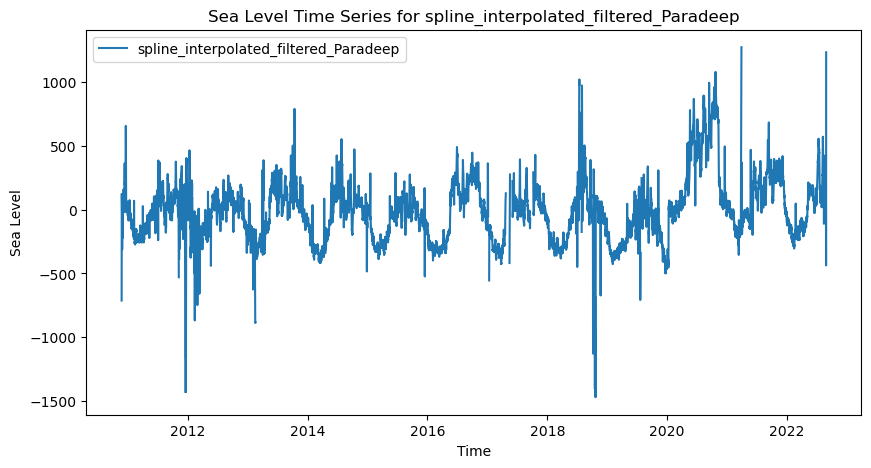

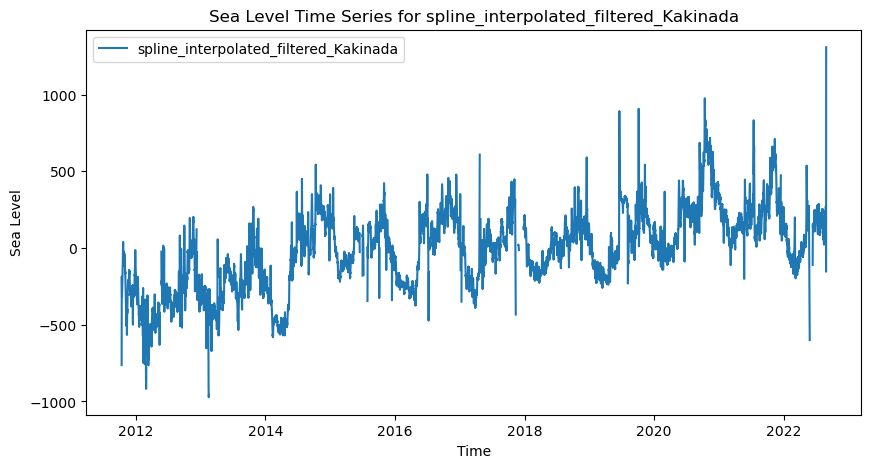

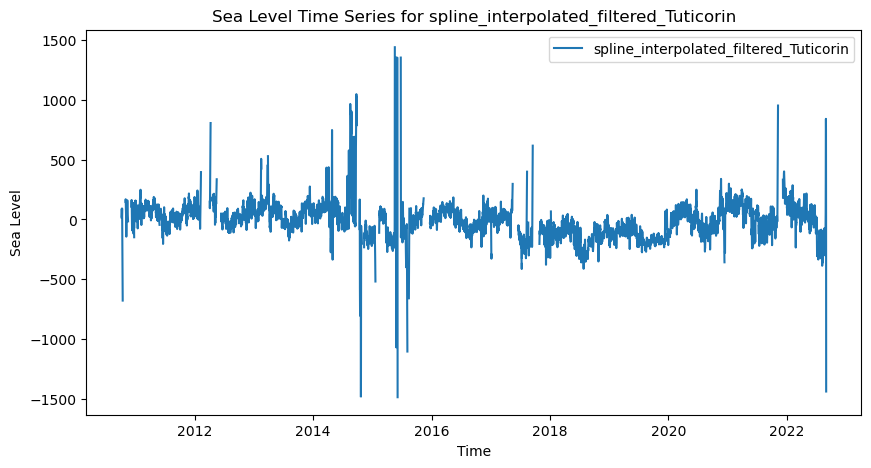

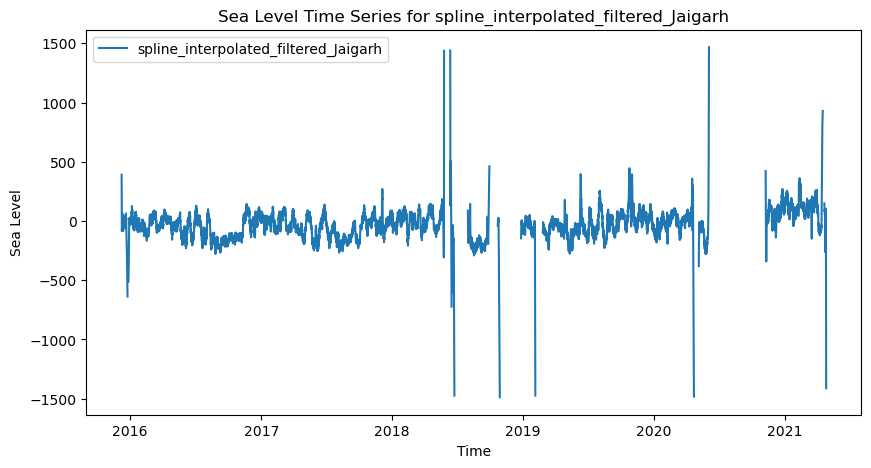

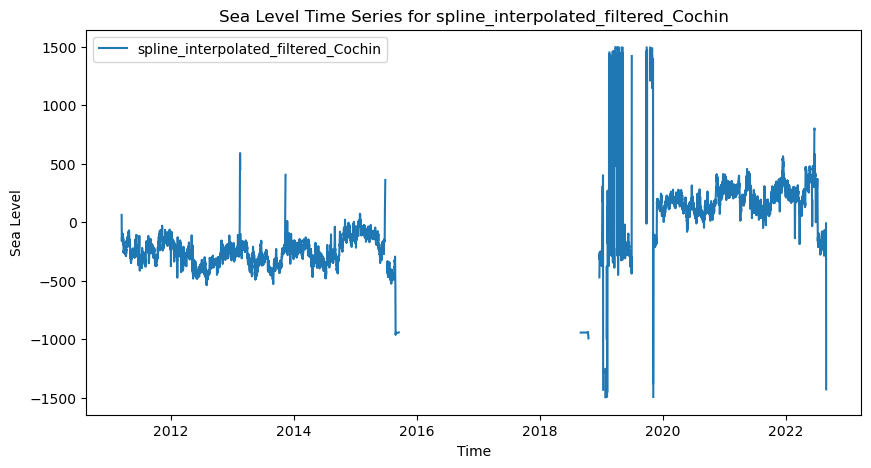

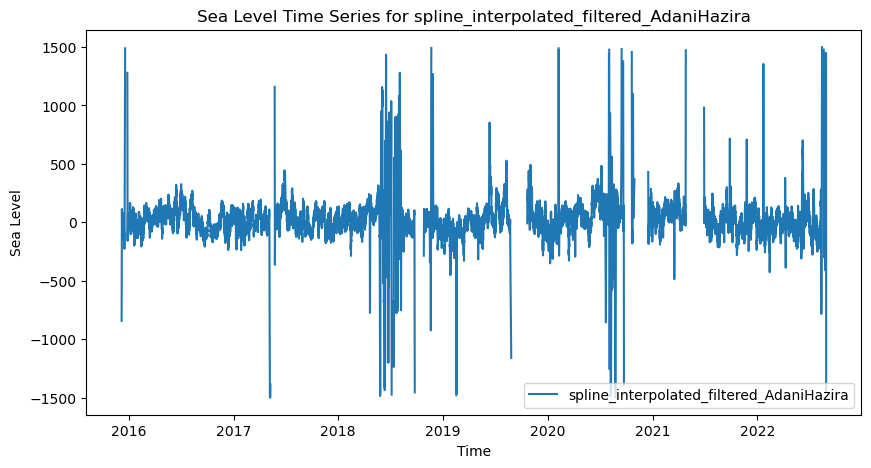

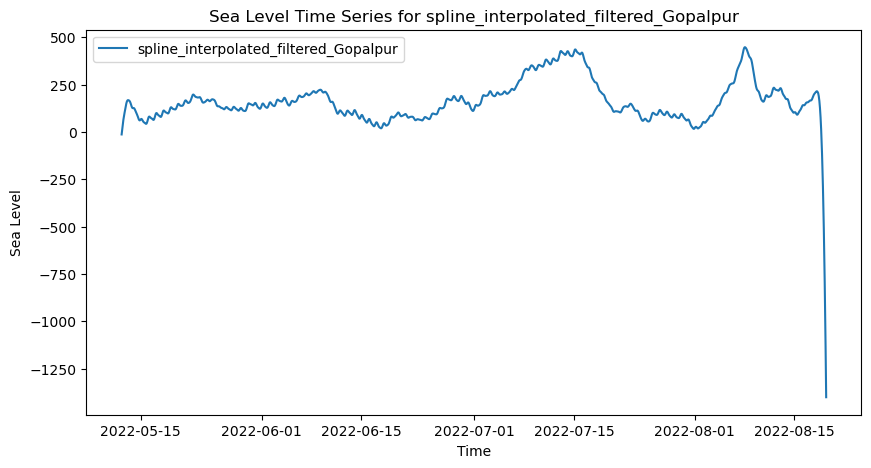

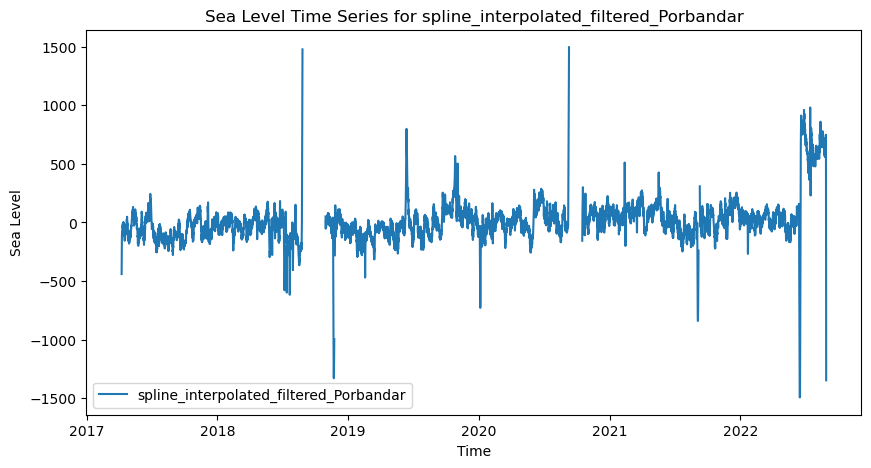

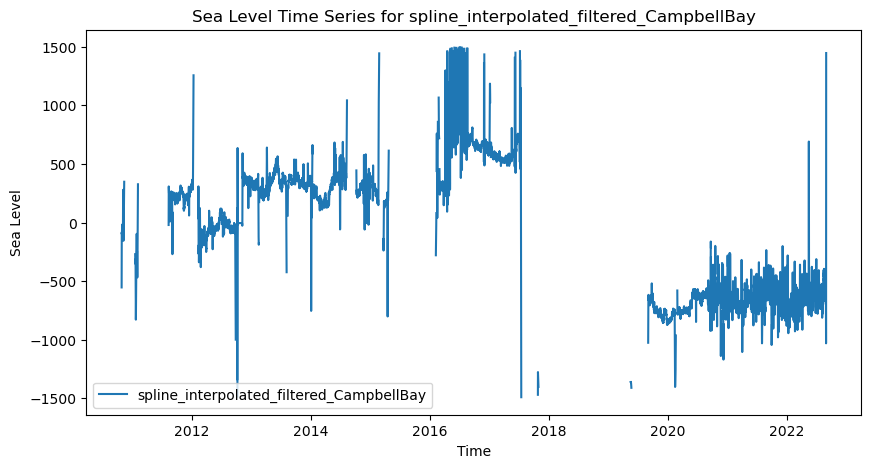

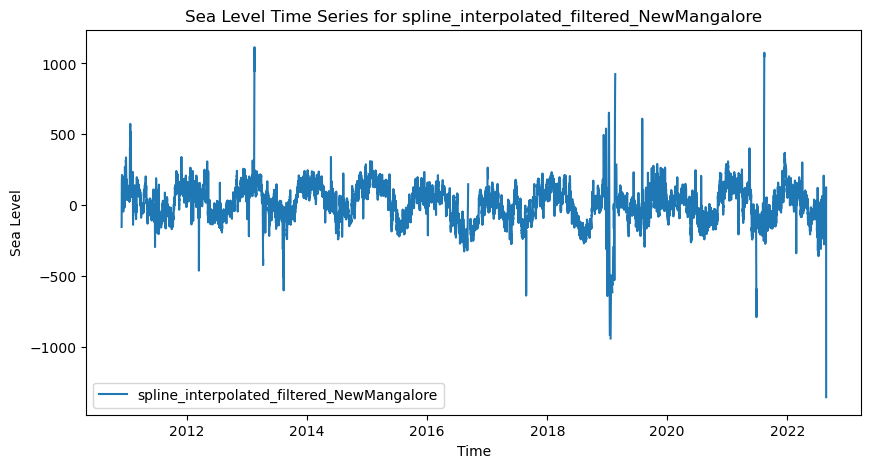

In [11]:
# Loop through all files in the directory
for filename in os.listdir(directory):
    if filename.startswith('spline_'):  # Check for CSV files
        file_path = os.path.join(directory, filename)
        df = pd.read_csv(file_path)  # Read the CSV file
        
        # Assuming the CSV file has columns 'Time' and 'Sl'
        df['Time'] = pd.to_datetime(df['Time'])  # Convert the 'Time' column to datetime
        plt.figure(figsize=(10, 5))  # Create a new figure for each plot
        plt.plot(df['Time'], df['Sl'], label=filename.replace('.csv', ''))  # Plot the data
        plt.xlabel('Time')
        plt.ylabel('Sea Level')
        plt.title(f'Sea Level Time Series for {filename.replace(".csv", "")}')
        plt.legend()
        plt.show()  # Show the plot